In [1]:
import gym
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

/home/emcy/miniconda3/envs/drlnd/lib/python3.6/site-packages/gym/core.py:27: UserWarning: WARN: Gym minimally supports python 3.6 as the python foundation not longer supports the version, please update your version to 3.7+
  "Gym minimally supports python 3.6 as the python foundation not longer supports the version, please update your version to 3.7+"


In [2]:
from unityagents import UnityEnvironment
env = UnityEnvironment(file_name="/data1/Projects/Udacity_RL/Value-based-methods/BananaCollector/Banana_Linux/Banana.x86_64")
#env = UnityEnvironment(file_name="/data1/Projects/Udacity_RL/Value-based-methods/BananaCollector/Banana_Linux_NoVis/Banana.x86_64")

# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


In [4]:
#View agents params
from dqn_agent import Agent
agent = Agent(state_size=state_size, action_size=action_size, seed=0)
agent.__dict__

{'state_size': 37,
 'action_size': 4,
 'seed': None,
 'qnetwork_local': QNetwork(
   (fc1): Linear(in_features=37, out_features=128, bias=True)
   (fc2): Linear(in_features=128, out_features=64, bias=True)
   (fc3): Linear(in_features=64, out_features=4, bias=True)
 ),
 'qnetwork_target': QNetwork(
   (fc1): Linear(in_features=37, out_features=128, bias=True)
   (fc2): Linear(in_features=128, out_features=64, bias=True)
   (fc3): Linear(in_features=64, out_features=4, bias=True)
 ),
 'optimizer': Adam (
 Parameter Group 0
     amsgrad: False
     betas: (0.9, 0.999)
     eps: 1e-08
     lr: 5e-05
     weight_decay: 0
 ),
 'memory': <dqn_agent.ReplayBuffer at 0x7f82b23443c8>,
 't_step': 0}

Episode 100	Average Score: 0.22 	 0.50 Seconds Elapsed
Episode 200	Average Score: 3.09 	 0.49 Seconds Elapsed
Episode 300	Average Score: 6.12 	 0.52 Seconds Elapsed
Episode 400	Average Score: 8.61 	 0.51 Seconds Elapsed
Episode 437	Average Score: 10.01 	 0.51 Seconds Elapsed
Environment solved in 337 episodes!	Average Score: 10.01
Episode 500	Average Score: 10.91 	 0.51 Seconds Elapsed
Episode 600	Average Score: 13.31 	 0.52 Seconds Elapsed
Episode 700	Average Score: 14.34 	 0.51 Seconds Elapsed
Episode 780	Average Score: 15.03 	 0.52 Seconds Elapsed
Environment solved in 680 episodes!	Average Score: 15.03
Episode 781	Average Score: 15.05 	 0.54 Seconds Elapsed
Environment solved in 681 episodes!	Average Score: 15.05
Episode 782	Average Score: 15.13 	 0.51 Seconds Elapsed
Environment solved in 682 episodes!	Average Score: 15.13
Episode 783	Average Score: 15.06 	 0.51 Seconds Elapsed
Environment solved in 683 episodes!	Average Score: 15.06
Episode 785	Average Score: 15.08 	 0.51 Seconds

Episode 851	Average Score: 15.03 	 0.50 Seconds Elapsed
Environment solved in 751 episodes!	Average Score: 15.03
Episode 852	Average Score: 15.16 	 0.51 Seconds Elapsed
Environment solved in 752 episodes!	Average Score: 15.16
Episode 853	Average Score: 15.19 	 0.50 Seconds Elapsed
Environment solved in 753 episodes!	Average Score: 15.19
Episode 854	Average Score: 15.25 	 0.51 Seconds Elapsed
Environment solved in 754 episodes!	Average Score: 15.25
Episode 855	Average Score: 15.25 	 0.51 Seconds Elapsed
Environment solved in 755 episodes!	Average Score: 15.25
Episode 856	Average Score: 15.28 	 0.51 Seconds Elapsed
Environment solved in 756 episodes!	Average Score: 15.28
Episode 857	Average Score: 15.35 	 0.53 Seconds Elapsed
Environment solved in 757 episodes!	Average Score: 15.35
Episode 858	Average Score: 15.33 	 0.53 Seconds Elapsed
Environment solved in 758 episodes!	Average Score: 15.33
Episode 859	Average Score: 15.36 	 0.51 Seconds Elapsed
Environment solved in 759 episodes!	Aver

Episode 955	Average Score: 15.07 	 0.53 Seconds Elapsed
Environment solved in 855 episodes!	Average Score: 15.07
Episode 956	Average Score: 15.01 	 0.53 Seconds Elapsed
Environment solved in 856 episodes!	Average Score: 15.01
Episode 957	Average Score: 15.02 	 0.51 Seconds Elapsed
Environment solved in 857 episodes!	Average Score: 15.02
Episode 958	Average Score: 15.02 	 0.52 Seconds Elapsed
Environment solved in 858 episodes!	Average Score: 15.02
Episode 959	Average Score: 15.07 	 0.52 Seconds Elapsed
Environment solved in 859 episodes!	Average Score: 15.07
Episode 960	Average Score: 15.00 	 0.51 Seconds Elapsed
Environment solved in 860 episodes!	Average Score: 15.00
Episode 961	Average Score: 15.11 	 0.52 Seconds Elapsed
Environment solved in 861 episodes!	Average Score: 15.11
Episode 962	Average Score: 15.22 	 0.52 Seconds Elapsed
Environment solved in 862 episodes!	Average Score: 15.22
Episode 963	Average Score: 15.15 	 0.52 Seconds Elapsed
Environment solved in 863 episodes!	Aver

Episode 1030	Average Score: 15.16 	 0.52 Seconds Elapsed
Environment solved in 930 episodes!	Average Score: 15.16
Episode 1031	Average Score: 15.24 	 0.51 Seconds Elapsed
Environment solved in 931 episodes!	Average Score: 15.24
Episode 1032	Average Score: 15.21 	 0.51 Seconds Elapsed
Environment solved in 932 episodes!	Average Score: 15.21
Episode 1033	Average Score: 15.28 	 0.53 Seconds Elapsed
Environment solved in 933 episodes!	Average Score: 15.28
Episode 1034	Average Score: 15.29 	 0.51 Seconds Elapsed
Environment solved in 934 episodes!	Average Score: 15.29
Episode 1035	Average Score: 15.23 	 0.52 Seconds Elapsed
Environment solved in 935 episodes!	Average Score: 15.23
Episode 1036	Average Score: 15.31 	 0.51 Seconds Elapsed
Environment solved in 936 episodes!	Average Score: 15.31
Episode 1037	Average Score: 15.36 	 0.50 Seconds Elapsed
Environment solved in 937 episodes!	Average Score: 15.36
Episode 1038	Average Score: 15.38 	 0.50 Seconds Elapsed
Environment solved in 938 episo

Episode 1102	Average Score: 15.91 	 0.52 Seconds Elapsed
Environment solved in 1002 episodes!	Average Score: 15.91
Episode 1103	Average Score: 15.91 	 0.51 Seconds Elapsed
Environment solved in 1003 episodes!	Average Score: 15.91
Episode 1104	Average Score: 15.89 	 0.52 Seconds Elapsed
Environment solved in 1004 episodes!	Average Score: 15.89
Episode 1105	Average Score: 15.91 	 0.51 Seconds Elapsed
Environment solved in 1005 episodes!	Average Score: 15.91
Episode 1106	Average Score: 15.96 	 0.52 Seconds Elapsed
Environment solved in 1006 episodes!	Average Score: 15.96
Episode 1107	Average Score: 16.03 	 0.51 Seconds Elapsed
Environment solved in 1007 episodes!	Average Score: 16.03
Episode 1108	Average Score: 16.06 	 0.51 Seconds Elapsed
Environment solved in 1008 episodes!	Average Score: 16.06
Episode 1109	Average Score: 16.15 	 0.53 Seconds Elapsed
Environment solved in 1009 episodes!	Average Score: 16.15
Episode 1110	Average Score: 16.17 	 0.54 Seconds Elapsed
Environment solved in 1

Episode 1174	Average Score: 16.11 	 0.51 Seconds Elapsed
Environment solved in 1074 episodes!	Average Score: 16.11
Episode 1175	Average Score: 16.18 	 0.51 Seconds Elapsed
Environment solved in 1075 episodes!	Average Score: 16.18
Episode 1176	Average Score: 16.11 	 0.51 Seconds Elapsed
Environment solved in 1076 episodes!	Average Score: 16.11
Episode 1177	Average Score: 16.11 	 0.52 Seconds Elapsed
Environment solved in 1077 episodes!	Average Score: 16.11
Episode 1178	Average Score: 16.12 	 0.53 Seconds Elapsed
Environment solved in 1078 episodes!	Average Score: 16.12
Episode 1179	Average Score: 16.10 	 0.52 Seconds Elapsed
Environment solved in 1079 episodes!	Average Score: 16.10
Episode 1180	Average Score: 16.06 	 0.52 Seconds Elapsed
Environment solved in 1080 episodes!	Average Score: 16.06
Episode 1181	Average Score: 16.10 	 0.52 Seconds Elapsed
Environment solved in 1081 episodes!	Average Score: 16.10
Episode 1182	Average Score: 16.07 	 0.52 Seconds Elapsed
Environment solved in 1

Episode 1246	Average Score: 15.57 	 0.53 Seconds Elapsed
Environment solved in 1146 episodes!	Average Score: 15.57
Episode 1247	Average Score: 15.68 	 0.51 Seconds Elapsed
Environment solved in 1147 episodes!	Average Score: 15.68
Episode 1248	Average Score: 15.67 	 0.52 Seconds Elapsed
Environment solved in 1148 episodes!	Average Score: 15.67
Episode 1249	Average Score: 15.59 	 0.52 Seconds Elapsed
Environment solved in 1149 episodes!	Average Score: 15.59
Episode 1250	Average Score: 15.58 	 0.52 Seconds Elapsed
Environment solved in 1150 episodes!	Average Score: 15.58
Episode 1251	Average Score: 15.59 	 0.52 Seconds Elapsed
Environment solved in 1151 episodes!	Average Score: 15.59
Episode 1252	Average Score: 15.51 	 0.53 Seconds Elapsed
Environment solved in 1152 episodes!	Average Score: 15.51
Episode 1253	Average Score: 15.51 	 0.52 Seconds Elapsed
Environment solved in 1153 episodes!	Average Score: 15.51
Episode 1254	Average Score: 15.49 	 0.52 Seconds Elapsed
Environment solved in 1

Episode 1318	Average Score: 15.55 	 0.51 Seconds Elapsed
Environment solved in 1218 episodes!	Average Score: 15.55
Episode 1319	Average Score: 15.55 	 0.50 Seconds Elapsed
Environment solved in 1219 episodes!	Average Score: 15.55
Episode 1320	Average Score: 15.61 	 0.50 Seconds Elapsed
Environment solved in 1220 episodes!	Average Score: 15.61
Episode 1321	Average Score: 15.57 	 0.50 Seconds Elapsed
Environment solved in 1221 episodes!	Average Score: 15.57
Episode 1322	Average Score: 15.56 	 0.52 Seconds Elapsed
Environment solved in 1222 episodes!	Average Score: 15.56
Episode 1323	Average Score: 15.49 	 0.52 Seconds Elapsed
Environment solved in 1223 episodes!	Average Score: 15.49
Episode 1324	Average Score: 15.44 	 0.51 Seconds Elapsed
Environment solved in 1224 episodes!	Average Score: 15.44
Episode 1325	Average Score: 15.48 	 0.51 Seconds Elapsed
Environment solved in 1225 episodes!	Average Score: 15.48
Episode 1326	Average Score: 15.46 	 0.51 Seconds Elapsed
Environment solved in 1

Episode 1390	Average Score: 15.90 	 0.51 Seconds Elapsed
Environment solved in 1290 episodes!	Average Score: 15.90
Episode 1391	Average Score: 15.94 	 0.54 Seconds Elapsed
Environment solved in 1291 episodes!	Average Score: 15.94
Episode 1392	Average Score: 15.94 	 0.52 Seconds Elapsed
Environment solved in 1292 episodes!	Average Score: 15.94
Episode 1393	Average Score: 15.92 	 0.51 Seconds Elapsed
Environment solved in 1293 episodes!	Average Score: 15.92
Episode 1394	Average Score: 15.80 	 0.51 Seconds Elapsed
Environment solved in 1294 episodes!	Average Score: 15.80
Episode 1395	Average Score: 15.74 	 0.51 Seconds Elapsed
Environment solved in 1295 episodes!	Average Score: 15.74
Episode 1396	Average Score: 15.68 	 0.52 Seconds Elapsed
Environment solved in 1296 episodes!	Average Score: 15.68
Episode 1397	Average Score: 15.73 	 0.52 Seconds Elapsed
Environment solved in 1297 episodes!	Average Score: 15.73
Episode 1398	Average Score: 15.78 	 0.50 Seconds Elapsed
Environment solved in 1

Episode 1462	Average Score: 15.92 	 0.51 Seconds Elapsed
Environment solved in 1362 episodes!	Average Score: 15.92
Episode 1463	Average Score: 15.82 	 0.52 Seconds Elapsed
Environment solved in 1363 episodes!	Average Score: 15.82
Episode 1464	Average Score: 15.78 	 0.50 Seconds Elapsed
Environment solved in 1364 episodes!	Average Score: 15.78
Episode 1465	Average Score: 15.83 	 0.51 Seconds Elapsed
Environment solved in 1365 episodes!	Average Score: 15.83
Episode 1466	Average Score: 15.79 	 0.51 Seconds Elapsed
Environment solved in 1366 episodes!	Average Score: 15.79
Episode 1467	Average Score: 15.78 	 0.52 Seconds Elapsed
Environment solved in 1367 episodes!	Average Score: 15.78
Episode 1468	Average Score: 15.80 	 0.51 Seconds Elapsed
Environment solved in 1368 episodes!	Average Score: 15.80
Episode 1469	Average Score: 15.76 	 0.52 Seconds Elapsed
Environment solved in 1369 episodes!	Average Score: 15.76
Episode 1470	Average Score: 15.81 	 0.51 Seconds Elapsed
Environment solved in 1

Episode 1534	Average Score: 16.49 	 0.50 Seconds Elapsed
Environment solved in 1434 episodes!	Average Score: 16.49
Episode 1535	Average Score: 16.36 	 0.50 Seconds Elapsed
Environment solved in 1435 episodes!	Average Score: 16.36
Episode 1536	Average Score: 16.33 	 0.50 Seconds Elapsed
Environment solved in 1436 episodes!	Average Score: 16.33
Episode 1537	Average Score: 16.32 	 0.52 Seconds Elapsed
Environment solved in 1437 episodes!	Average Score: 16.32
Episode 1538	Average Score: 16.38 	 0.50 Seconds Elapsed
Environment solved in 1438 episodes!	Average Score: 16.38
Episode 1539	Average Score: 16.28 	 0.51 Seconds Elapsed
Environment solved in 1439 episodes!	Average Score: 16.28
Episode 1540	Average Score: 16.27 	 0.50 Seconds Elapsed
Environment solved in 1440 episodes!	Average Score: 16.27
Episode 1541	Average Score: 16.20 	 0.51 Seconds Elapsed
Environment solved in 1441 episodes!	Average Score: 16.20
Episode 1542	Average Score: 16.16 	 0.50 Seconds Elapsed
Environment solved in 1

Episode 1606	Average Score: 15.23 	 0.51 Seconds Elapsed
Environment solved in 1506 episodes!	Average Score: 15.23
Episode 1607	Average Score: 15.33 	 0.51 Seconds Elapsed
Environment solved in 1507 episodes!	Average Score: 15.33
Episode 1608	Average Score: 15.31 	 0.52 Seconds Elapsed
Environment solved in 1508 episodes!	Average Score: 15.31
Episode 1609	Average Score: 15.28 	 0.52 Seconds Elapsed
Environment solved in 1509 episodes!	Average Score: 15.28
Episode 1610	Average Score: 15.29 	 0.53 Seconds Elapsed
Environment solved in 1510 episodes!	Average Score: 15.29
Episode 1611	Average Score: 15.23 	 0.52 Seconds Elapsed
Environment solved in 1511 episodes!	Average Score: 15.23
Episode 1612	Average Score: 15.17 	 0.52 Seconds Elapsed
Environment solved in 1512 episodes!	Average Score: 15.17
Episode 1613	Average Score: 15.08 	 0.51 Seconds Elapsed
Environment solved in 1513 episodes!	Average Score: 15.08
Episode 1614	Average Score: 15.07 	 0.52 Seconds Elapsed
Environment solved in 1

Episode 1693	Average Score: 15.98 	 0.52 Seconds Elapsed
Environment solved in 1593 episodes!	Average Score: 15.98
Episode 1694	Average Score: 15.93 	 0.56 Seconds Elapsed
Environment solved in 1594 episodes!	Average Score: 15.93
Episode 1695	Average Score: 15.97 	 0.51 Seconds Elapsed
Environment solved in 1595 episodes!	Average Score: 15.97
Episode 1696	Average Score: 15.96 	 0.53 Seconds Elapsed
Environment solved in 1596 episodes!	Average Score: 15.96
Episode 1697	Average Score: 15.92 	 0.51 Seconds Elapsed
Environment solved in 1597 episodes!	Average Score: 15.92
Episode 1698	Average Score: 15.96 	 0.51 Seconds Elapsed
Environment solved in 1598 episodes!	Average Score: 15.96
Episode 1699	Average Score: 15.93 	 0.52 Seconds Elapsed
Environment solved in 1599 episodes!	Average Score: 15.93
Episode 1700	Average Score: 15.94 	 0.52 Seconds Elapsed

Environment solved in 1600 episodes!	Average Score: 15.94
Episode 1701	Average Score: 15.95 	 0.53 Seconds Elapsed
Environment solved in 

Episode 1765	Average Score: 16.27 	 0.51 Seconds Elapsed
Environment solved in 1665 episodes!	Average Score: 16.27
Episode 1766	Average Score: 16.17 	 0.51 Seconds Elapsed
Environment solved in 1666 episodes!	Average Score: 16.17
Episode 1767	Average Score: 16.20 	 0.51 Seconds Elapsed
Environment solved in 1667 episodes!	Average Score: 16.20
Episode 1768	Average Score: 16.23 	 0.51 Seconds Elapsed
Environment solved in 1668 episodes!	Average Score: 16.23
Episode 1769	Average Score: 16.21 	 0.53 Seconds Elapsed
Environment solved in 1669 episodes!	Average Score: 16.21
Episode 1770	Average Score: 16.28 	 0.51 Seconds Elapsed
Environment solved in 1670 episodes!	Average Score: 16.28
Episode 1771	Average Score: 16.27 	 0.52 Seconds Elapsed
Environment solved in 1671 episodes!	Average Score: 16.27
Episode 1772	Average Score: 16.30 	 0.52 Seconds Elapsed
Environment solved in 1672 episodes!	Average Score: 16.30
Episode 1773	Average Score: 16.31 	 0.52 Seconds Elapsed
Environment solved in 1

Episode 1837	Average Score: 16.34 	 0.52 Seconds Elapsed
Environment solved in 1737 episodes!	Average Score: 16.34
Episode 1838	Average Score: 16.31 	 0.52 Seconds Elapsed
Environment solved in 1738 episodes!	Average Score: 16.31
Episode 1839	Average Score: 16.32 	 0.51 Seconds Elapsed
Environment solved in 1739 episodes!	Average Score: 16.32
Episode 1840	Average Score: 16.32 	 0.51 Seconds Elapsed
Environment solved in 1740 episodes!	Average Score: 16.32
Episode 1841	Average Score: 16.26 	 0.51 Seconds Elapsed
Environment solved in 1741 episodes!	Average Score: 16.26
Episode 1842	Average Score: 16.22 	 0.51 Seconds Elapsed
Environment solved in 1742 episodes!	Average Score: 16.22
Episode 1843	Average Score: 16.28 	 0.51 Seconds Elapsed
Environment solved in 1743 episodes!	Average Score: 16.28
Episode 1844	Average Score: 16.28 	 0.52 Seconds Elapsed
Environment solved in 1744 episodes!	Average Score: 16.28
Episode 1845	Average Score: 16.22 	 0.52 Seconds Elapsed
Environment solved in 1

Episode 1909	Average Score: 16.21 	 0.52 Seconds Elapsed
Environment solved in 1809 episodes!	Average Score: 16.21
Episode 1910	Average Score: 16.19 	 0.53 Seconds Elapsed
Environment solved in 1810 episodes!	Average Score: 16.19
Episode 1911	Average Score: 16.25 	 0.51 Seconds Elapsed
Environment solved in 1811 episodes!	Average Score: 16.25
Episode 1912	Average Score: 16.22 	 0.51 Seconds Elapsed
Environment solved in 1812 episodes!	Average Score: 16.22
Episode 1913	Average Score: 16.15 	 0.52 Seconds Elapsed
Environment solved in 1813 episodes!	Average Score: 16.15
Episode 1914	Average Score: 16.09 	 0.52 Seconds Elapsed
Environment solved in 1814 episodes!	Average Score: 16.09
Episode 1915	Average Score: 16.09 	 0.51 Seconds Elapsed
Environment solved in 1815 episodes!	Average Score: 16.09
Episode 1916	Average Score: 16.04 	 0.52 Seconds Elapsed
Environment solved in 1816 episodes!	Average Score: 16.04
Episode 1917	Average Score: 16.09 	 0.51 Seconds Elapsed
Environment solved in 1

Episode 1981	Average Score: 15.86 	 0.53 Seconds Elapsed
Environment solved in 1881 episodes!	Average Score: 15.86
Episode 1982	Average Score: 15.95 	 0.53 Seconds Elapsed
Environment solved in 1882 episodes!	Average Score: 15.95
Episode 1983	Average Score: 15.88 	 0.52 Seconds Elapsed
Environment solved in 1883 episodes!	Average Score: 15.88
Episode 1984	Average Score: 15.92 	 0.51 Seconds Elapsed
Environment solved in 1884 episodes!	Average Score: 15.92
Episode 1985	Average Score: 15.97 	 0.52 Seconds Elapsed
Environment solved in 1885 episodes!	Average Score: 15.97
Episode 1986	Average Score: 15.88 	 0.52 Seconds Elapsed
Environment solved in 1886 episodes!	Average Score: 15.88
Episode 1987	Average Score: 15.87 	 0.51 Seconds Elapsed
Environment solved in 1887 episodes!	Average Score: 15.87
Episode 1988	Average Score: 15.88 	 0.51 Seconds Elapsed
Environment solved in 1888 episodes!	Average Score: 15.88
Episode 1989	Average Score: 15.90 	 0.51 Seconds Elapsed
Environment solved in 1

Episode 2053	Average Score: 15.53 	 0.52 Seconds Elapsed
Environment solved in 1953 episodes!	Average Score: 15.53
Episode 2054	Average Score: 15.55 	 0.51 Seconds Elapsed
Environment solved in 1954 episodes!	Average Score: 15.55
Episode 2055	Average Score: 15.58 	 0.53 Seconds Elapsed
Environment solved in 1955 episodes!	Average Score: 15.58
Episode 2056	Average Score: 15.51 	 0.51 Seconds Elapsed
Environment solved in 1956 episodes!	Average Score: 15.51
Episode 2057	Average Score: 15.50 	 0.51 Seconds Elapsed
Environment solved in 1957 episodes!	Average Score: 15.50
Episode 2058	Average Score: 15.53 	 0.52 Seconds Elapsed
Environment solved in 1958 episodes!	Average Score: 15.53
Episode 2059	Average Score: 15.50 	 0.53 Seconds Elapsed
Environment solved in 1959 episodes!	Average Score: 15.50
Episode 2060	Average Score: 15.49 	 0.51 Seconds Elapsed
Environment solved in 1960 episodes!	Average Score: 15.49
Episode 2061	Average Score: 15.51 	 0.51 Seconds Elapsed
Environment solved in 1

Episode 2125	Average Score: 15.79 	 0.52 Seconds Elapsed
Environment solved in 2025 episodes!	Average Score: 15.79
Episode 2126	Average Score: 15.79 	 0.52 Seconds Elapsed
Environment solved in 2026 episodes!	Average Score: 15.79
Episode 2127	Average Score: 15.77 	 0.50 Seconds Elapsed
Environment solved in 2027 episodes!	Average Score: 15.77
Episode 2128	Average Score: 15.72 	 0.52 Seconds Elapsed
Environment solved in 2028 episodes!	Average Score: 15.72
Episode 2129	Average Score: 15.61 	 0.52 Seconds Elapsed
Environment solved in 2029 episodes!	Average Score: 15.61
Episode 2130	Average Score: 15.65 	 0.51 Seconds Elapsed
Environment solved in 2030 episodes!	Average Score: 15.65
Episode 2131	Average Score: 15.65 	 0.51 Seconds Elapsed
Environment solved in 2031 episodes!	Average Score: 15.65
Episode 2132	Average Score: 15.69 	 0.52 Seconds Elapsed
Environment solved in 2032 episodes!	Average Score: 15.69
Episode 2133	Average Score: 15.78 	 0.51 Seconds Elapsed
Environment solved in 2

Episode 2197	Average Score: 16.42 	 0.52 Seconds Elapsed
Environment solved in 2097 episodes!	Average Score: 16.42
Episode 2198	Average Score: 16.35 	 0.51 Seconds Elapsed
Environment solved in 2098 episodes!	Average Score: 16.35
Episode 2199	Average Score: 16.31 	 0.51 Seconds Elapsed
Environment solved in 2099 episodes!	Average Score: 16.31
Episode 2200	Average Score: 16.34 	 0.52 Seconds Elapsed

Environment solved in 2100 episodes!	Average Score: 16.34
Episode 2201	Average Score: 16.41 	 0.51 Seconds Elapsed
Environment solved in 2101 episodes!	Average Score: 16.41
Episode 2202	Average Score: 16.40 	 0.52 Seconds Elapsed
Environment solved in 2102 episodes!	Average Score: 16.40
Episode 2203	Average Score: 16.40 	 0.53 Seconds Elapsed
Environment solved in 2103 episodes!	Average Score: 16.40
Episode 2204	Average Score: 16.38 	 0.50 Seconds Elapsed
Environment solved in 2104 episodes!	Average Score: 16.38
Episode 2205	Average Score: 16.42 	 0.51 Seconds Elapsed
Environment solved in 

Episode 2269	Average Score: 15.67 	 0.51 Seconds Elapsed
Environment solved in 2169 episodes!	Average Score: 15.67
Episode 2270	Average Score: 15.71 	 0.51 Seconds Elapsed
Environment solved in 2170 episodes!	Average Score: 15.71
Episode 2271	Average Score: 15.77 	 0.53 Seconds Elapsed
Environment solved in 2171 episodes!	Average Score: 15.77
Episode 2272	Average Score: 15.71 	 0.52 Seconds Elapsed
Environment solved in 2172 episodes!	Average Score: 15.71
Episode 2273	Average Score: 15.68 	 0.54 Seconds Elapsed
Environment solved in 2173 episodes!	Average Score: 15.68
Episode 2274	Average Score: 15.69 	 0.52 Seconds Elapsed
Environment solved in 2174 episodes!	Average Score: 15.69
Episode 2275	Average Score: 15.70 	 0.53 Seconds Elapsed
Environment solved in 2175 episodes!	Average Score: 15.70
Episode 2276	Average Score: 15.59 	 0.51 Seconds Elapsed
Environment solved in 2176 episodes!	Average Score: 15.59
Episode 2277	Average Score: 15.59 	 0.52 Seconds Elapsed
Environment solved in 2

Episode 2341	Average Score: 16.09 	 0.51 Seconds Elapsed
Environment solved in 2241 episodes!	Average Score: 16.09
Episode 2342	Average Score: 16.08 	 0.52 Seconds Elapsed
Environment solved in 2242 episodes!	Average Score: 16.08
Episode 2343	Average Score: 16.12 	 0.51 Seconds Elapsed
Environment solved in 2243 episodes!	Average Score: 16.12
Episode 2344	Average Score: 16.16 	 0.51 Seconds Elapsed
Environment solved in 2244 episodes!	Average Score: 16.16
Episode 2345	Average Score: 16.21 	 0.52 Seconds Elapsed
Environment solved in 2245 episodes!	Average Score: 16.21
Episode 2346	Average Score: 16.18 	 0.52 Seconds Elapsed
Environment solved in 2246 episodes!	Average Score: 16.18
Episode 2347	Average Score: 16.15 	 0.52 Seconds Elapsed
Environment solved in 2247 episodes!	Average Score: 16.15
Episode 2348	Average Score: 16.20 	 0.53 Seconds Elapsed
Environment solved in 2248 episodes!	Average Score: 16.20
Episode 2349	Average Score: 16.18 	 0.51 Seconds Elapsed
Environment solved in 2

Episode 2413	Average Score: 16.06 	 0.52 Seconds Elapsed
Environment solved in 2313 episodes!	Average Score: 16.06
Episode 2414	Average Score: 16.13 	 0.52 Seconds Elapsed
Environment solved in 2314 episodes!	Average Score: 16.13
Episode 2415	Average Score: 16.09 	 0.52 Seconds Elapsed
Environment solved in 2315 episodes!	Average Score: 16.09
Episode 2416	Average Score: 16.03 	 0.52 Seconds Elapsed
Environment solved in 2316 episodes!	Average Score: 16.03
Episode 2417	Average Score: 15.99 	 0.52 Seconds Elapsed
Environment solved in 2317 episodes!	Average Score: 15.99
Episode 2418	Average Score: 15.94 	 0.52 Seconds Elapsed
Environment solved in 2318 episodes!	Average Score: 15.94
Episode 2419	Average Score: 15.87 	 0.52 Seconds Elapsed
Environment solved in 2319 episodes!	Average Score: 15.87
Episode 2420	Average Score: 15.79 	 0.52 Seconds Elapsed
Environment solved in 2320 episodes!	Average Score: 15.79
Episode 2421	Average Score: 15.81 	 0.51 Seconds Elapsed
Environment solved in 2

Episode 2488	Average Score: 15.18 	 0.50 Seconds Elapsed
Environment solved in 2388 episodes!	Average Score: 15.18
Episode 2489	Average Score: 15.15 	 0.51 Seconds Elapsed
Environment solved in 2389 episodes!	Average Score: 15.15
Episode 2490	Average Score: 15.19 	 0.52 Seconds Elapsed
Environment solved in 2390 episodes!	Average Score: 15.19
Episode 2491	Average Score: 15.28 	 0.52 Seconds Elapsed
Environment solved in 2391 episodes!	Average Score: 15.28
Episode 2492	Average Score: 15.27 	 0.52 Seconds Elapsed
Environment solved in 2392 episodes!	Average Score: 15.27
Episode 2493	Average Score: 15.27 	 0.54 Seconds Elapsed
Environment solved in 2393 episodes!	Average Score: 15.27
Episode 2494	Average Score: 15.32 	 0.52 Seconds Elapsed
Environment solved in 2394 episodes!	Average Score: 15.32
Episode 2495	Average Score: 15.33 	 0.52 Seconds Elapsed
Environment solved in 2395 episodes!	Average Score: 15.33
Episode 2496	Average Score: 15.33 	 0.51 Seconds Elapsed
Environment solved in 2

Episode 2560	Average Score: 16.39 	 0.53 Seconds Elapsed
Environment solved in 2460 episodes!	Average Score: 16.39
Episode 2561	Average Score: 16.47 	 0.53 Seconds Elapsed
Environment solved in 2461 episodes!	Average Score: 16.47
Episode 2562	Average Score: 16.49 	 0.52 Seconds Elapsed
Environment solved in 2462 episodes!	Average Score: 16.49
Episode 2563	Average Score: 16.53 	 0.52 Seconds Elapsed
Environment solved in 2463 episodes!	Average Score: 16.53
Episode 2564	Average Score: 16.64 	 0.51 Seconds Elapsed
Environment solved in 2464 episodes!	Average Score: 16.64
Episode 2565	Average Score: 16.66 	 0.51 Seconds Elapsed
Environment solved in 2465 episodes!	Average Score: 16.66
Episode 2566	Average Score: 16.60 	 0.51 Seconds Elapsed
Environment solved in 2466 episodes!	Average Score: 16.60
Episode 2567	Average Score: 16.68 	 0.51 Seconds Elapsed
Environment solved in 2467 episodes!	Average Score: 16.68
Episode 2568	Average Score: 16.63 	 0.52 Seconds Elapsed
Environment solved in 2

Episode 2632	Average Score: 16.32 	 0.53 Seconds Elapsed
Environment solved in 2532 episodes!	Average Score: 16.32
Episode 2633	Average Score: 16.31 	 0.52 Seconds Elapsed
Environment solved in 2533 episodes!	Average Score: 16.31
Episode 2634	Average Score: 16.30 	 0.52 Seconds Elapsed
Environment solved in 2534 episodes!	Average Score: 16.30
Episode 2635	Average Score: 16.25 	 0.51 Seconds Elapsed
Environment solved in 2535 episodes!	Average Score: 16.25
Episode 2636	Average Score: 16.38 	 0.51 Seconds Elapsed
Environment solved in 2536 episodes!	Average Score: 16.38
Episode 2637	Average Score: 16.25 	 0.53 Seconds Elapsed
Environment solved in 2537 episodes!	Average Score: 16.25
Episode 2638	Average Score: 16.16 	 0.54 Seconds Elapsed
Environment solved in 2538 episodes!	Average Score: 16.16
Episode 2639	Average Score: 16.10 	 0.52 Seconds Elapsed
Environment solved in 2539 episodes!	Average Score: 16.10
Episode 2640	Average Score: 16.15 	 0.51 Seconds Elapsed
Environment solved in 2

Episode 2704	Average Score: 16.01 	 0.50 Seconds Elapsed
Environment solved in 2604 episodes!	Average Score: 16.01
Episode 2705	Average Score: 16.03 	 0.52 Seconds Elapsed
Environment solved in 2605 episodes!	Average Score: 16.03
Episode 2706	Average Score: 16.02 	 0.51 Seconds Elapsed
Environment solved in 2606 episodes!	Average Score: 16.02
Episode 2707	Average Score: 16.03 	 0.51 Seconds Elapsed
Environment solved in 2607 episodes!	Average Score: 16.03
Episode 2708	Average Score: 16.05 	 0.52 Seconds Elapsed
Environment solved in 2608 episodes!	Average Score: 16.05
Episode 2709	Average Score: 16.14 	 0.52 Seconds Elapsed
Environment solved in 2609 episodes!	Average Score: 16.14
Episode 2710	Average Score: 16.11 	 0.52 Seconds Elapsed
Environment solved in 2610 episodes!	Average Score: 16.11
Episode 2711	Average Score: 16.12 	 0.52 Seconds Elapsed
Environment solved in 2611 episodes!	Average Score: 16.12
Episode 2712	Average Score: 16.16 	 0.51 Seconds Elapsed
Environment solved in 2

Episode 2776	Average Score: 16.42 	 0.52 Seconds Elapsed
Environment solved in 2676 episodes!	Average Score: 16.42
Episode 2777	Average Score: 16.42 	 0.51 Seconds Elapsed
Environment solved in 2677 episodes!	Average Score: 16.42
Episode 2778	Average Score: 16.52 	 0.53 Seconds Elapsed
Environment solved in 2678 episodes!	Average Score: 16.52
Episode 2779	Average Score: 16.55 	 0.52 Seconds Elapsed
Environment solved in 2679 episodes!	Average Score: 16.55
Episode 2780	Average Score: 16.56 	 0.52 Seconds Elapsed
Environment solved in 2680 episodes!	Average Score: 16.56
Episode 2781	Average Score: 16.50 	 0.52 Seconds Elapsed
Environment solved in 2681 episodes!	Average Score: 16.50
Episode 2782	Average Score: 16.45 	 0.54 Seconds Elapsed
Environment solved in 2682 episodes!	Average Score: 16.45
Episode 2783	Average Score: 16.43 	 0.52 Seconds Elapsed
Environment solved in 2683 episodes!	Average Score: 16.43
Episode 2784	Average Score: 16.43 	 0.52 Seconds Elapsed
Environment solved in 2

Episode 2848	Average Score: 16.88 	 0.52 Seconds Elapsed
Environment solved in 2748 episodes!	Average Score: 16.88
Episode 2849	Average Score: 16.79 	 0.53 Seconds Elapsed
Environment solved in 2749 episodes!	Average Score: 16.79
Episode 2850	Average Score: 16.90 	 0.52 Seconds Elapsed
Environment solved in 2750 episodes!	Average Score: 16.90
Episode 2851	Average Score: 16.91 	 0.51 Seconds Elapsed
Environment solved in 2751 episodes!	Average Score: 16.91
Episode 2852	Average Score: 16.90 	 0.52 Seconds Elapsed
Environment solved in 2752 episodes!	Average Score: 16.90
Episode 2853	Average Score: 16.84 	 0.52 Seconds Elapsed
Environment solved in 2753 episodes!	Average Score: 16.84
Episode 2854	Average Score: 16.86 	 0.51 Seconds Elapsed
Environment solved in 2754 episodes!	Average Score: 16.86
Episode 2855	Average Score: 16.85 	 0.52 Seconds Elapsed
Environment solved in 2755 episodes!	Average Score: 16.85
Episode 2856	Average Score: 16.90 	 0.51 Seconds Elapsed
Environment solved in 2

Episode 2920	Average Score: 17.50 	 0.51 Seconds Elapsed
Environment solved in 2820 episodes!	Average Score: 17.50
Episode 2921	Average Score: 17.49 	 0.51 Seconds Elapsed
Environment solved in 2821 episodes!	Average Score: 17.49
Episode 2922	Average Score: 17.46 	 0.51 Seconds Elapsed
Environment solved in 2822 episodes!	Average Score: 17.46
Episode 2923	Average Score: 17.44 	 0.51 Seconds Elapsed
Environment solved in 2823 episodes!	Average Score: 17.44
Episode 2924	Average Score: 17.43 	 0.52 Seconds Elapsed
Environment solved in 2824 episodes!	Average Score: 17.43
Episode 2925	Average Score: 17.47 	 0.51 Seconds Elapsed
Environment solved in 2825 episodes!	Average Score: 17.47
Episode 2926	Average Score: 17.52 	 0.53 Seconds Elapsed
Environment solved in 2826 episodes!	Average Score: 17.52
Episode 2927	Average Score: 17.52 	 0.51 Seconds Elapsed
Environment solved in 2827 episodes!	Average Score: 17.52
Episode 2928	Average Score: 17.47 	 0.52 Seconds Elapsed
Environment solved in 2

Episode 2992	Average Score: 17.22 	 0.51 Seconds Elapsed
Environment solved in 2892 episodes!	Average Score: 17.22
Episode 2993	Average Score: 17.21 	 0.53 Seconds Elapsed
Environment solved in 2893 episodes!	Average Score: 17.21
Episode 2994	Average Score: 17.12 	 0.52 Seconds Elapsed
Environment solved in 2894 episodes!	Average Score: 17.12
Episode 2995	Average Score: 17.03 	 0.53 Seconds Elapsed
Environment solved in 2895 episodes!	Average Score: 17.03
Episode 2996	Average Score: 17.02 	 0.52 Seconds Elapsed
Environment solved in 2896 episodes!	Average Score: 17.02
Episode 2997	Average Score: 17.01 	 0.50 Seconds Elapsed
Environment solved in 2897 episodes!	Average Score: 17.01
Episode 2998	Average Score: 16.91 	 0.53 Seconds Elapsed
Environment solved in 2898 episodes!	Average Score: 16.91
Episode 2999	Average Score: 16.91 	 0.51 Seconds Elapsed
Environment solved in 2899 episodes!	Average Score: 16.91
Episode 3000	Average Score: 16.88 	 0.51 Seconds Elapsed

Environment solved in 

Episode 3064	Average Score: 16.39 	 0.52 Seconds Elapsed
Environment solved in 2964 episodes!	Average Score: 16.39
Episode 3065	Average Score: 16.34 	 0.52 Seconds Elapsed
Environment solved in 2965 episodes!	Average Score: 16.34
Episode 3066	Average Score: 16.32 	 0.52 Seconds Elapsed
Environment solved in 2966 episodes!	Average Score: 16.32
Episode 3067	Average Score: 16.20 	 0.53 Seconds Elapsed
Environment solved in 2967 episodes!	Average Score: 16.20
Episode 3068	Average Score: 16.03 	 0.53 Seconds Elapsed
Environment solved in 2968 episodes!	Average Score: 16.03
Episode 3069	Average Score: 15.97 	 0.52 Seconds Elapsed
Environment solved in 2969 episodes!	Average Score: 15.97
Episode 3070	Average Score: 15.98 	 0.53 Seconds Elapsed
Environment solved in 2970 episodes!	Average Score: 15.98
Episode 3071	Average Score: 15.92 	 0.51 Seconds Elapsed
Environment solved in 2971 episodes!	Average Score: 15.92
Episode 3072	Average Score: 15.92 	 0.52 Seconds Elapsed
Environment solved in 2

Episode 3136	Average Score: 15.58 	 0.52 Seconds Elapsed
Environment solved in 3036 episodes!	Average Score: 15.58
Episode 3137	Average Score: 15.65 	 0.53 Seconds Elapsed
Environment solved in 3037 episodes!	Average Score: 15.65
Episode 3138	Average Score: 15.67 	 0.53 Seconds Elapsed
Environment solved in 3038 episodes!	Average Score: 15.67
Episode 3139	Average Score: 15.68 	 0.53 Seconds Elapsed
Environment solved in 3039 episodes!	Average Score: 15.68
Episode 3140	Average Score: 15.79 	 0.52 Seconds Elapsed
Environment solved in 3040 episodes!	Average Score: 15.79
Episode 3141	Average Score: 15.84 	 0.52 Seconds Elapsed
Environment solved in 3041 episodes!	Average Score: 15.84
Episode 3142	Average Score: 15.85 	 0.53 Seconds Elapsed
Environment solved in 3042 episodes!	Average Score: 15.85
Episode 3143	Average Score: 15.86 	 0.52 Seconds Elapsed
Environment solved in 3043 episodes!	Average Score: 15.86
Episode 3144	Average Score: 15.87 	 0.51 Seconds Elapsed
Environment solved in 3

Episode 3208	Average Score: 16.31 	 0.50 Seconds Elapsed
Environment solved in 3108 episodes!	Average Score: 16.31
Episode 3209	Average Score: 16.22 	 0.51 Seconds Elapsed
Environment solved in 3109 episodes!	Average Score: 16.22
Episode 3210	Average Score: 16.36 	 0.51 Seconds Elapsed
Environment solved in 3110 episodes!	Average Score: 16.36
Episode 3211	Average Score: 16.35 	 0.53 Seconds Elapsed
Environment solved in 3111 episodes!	Average Score: 16.35
Episode 3212	Average Score: 16.32 	 0.52 Seconds Elapsed
Environment solved in 3112 episodes!	Average Score: 16.32
Episode 3213	Average Score: 16.36 	 0.53 Seconds Elapsed
Environment solved in 3113 episodes!	Average Score: 16.36
Episode 3214	Average Score: 16.31 	 0.52 Seconds Elapsed
Environment solved in 3114 episodes!	Average Score: 16.31
Episode 3215	Average Score: 16.28 	 0.51 Seconds Elapsed
Environment solved in 3115 episodes!	Average Score: 16.28
Episode 3216	Average Score: 16.28 	 0.51 Seconds Elapsed
Environment solved in 3

Episode 3280	Average Score: 16.48 	 0.51 Seconds Elapsed
Environment solved in 3180 episodes!	Average Score: 16.48
Episode 3281	Average Score: 16.48 	 0.51 Seconds Elapsed
Environment solved in 3181 episodes!	Average Score: 16.48
Episode 3282	Average Score: 16.48 	 0.53 Seconds Elapsed
Environment solved in 3182 episodes!	Average Score: 16.48
Episode 3283	Average Score: 16.49 	 0.51 Seconds Elapsed
Environment solved in 3183 episodes!	Average Score: 16.49
Episode 3284	Average Score: 16.52 	 0.51 Seconds Elapsed
Environment solved in 3184 episodes!	Average Score: 16.52
Episode 3285	Average Score: 16.55 	 0.50 Seconds Elapsed
Environment solved in 3185 episodes!	Average Score: 16.55
Episode 3286	Average Score: 16.60 	 0.51 Seconds Elapsed
Environment solved in 3186 episodes!	Average Score: 16.60
Episode 3287	Average Score: 16.41 	 0.52 Seconds Elapsed
Environment solved in 3187 episodes!	Average Score: 16.41
Episode 3288	Average Score: 16.40 	 0.52 Seconds Elapsed
Environment solved in 3

Episode 3352	Average Score: 16.29 	 0.53 Seconds Elapsed
Environment solved in 3252 episodes!	Average Score: 16.29
Episode 3353	Average Score: 16.37 	 0.53 Seconds Elapsed
Environment solved in 3253 episodes!	Average Score: 16.37
Episode 3354	Average Score: 16.31 	 0.52 Seconds Elapsed
Environment solved in 3254 episodes!	Average Score: 16.31
Episode 3355	Average Score: 16.10 	 0.52 Seconds Elapsed
Environment solved in 3255 episodes!	Average Score: 16.10
Episode 3356	Average Score: 16.14 	 0.51 Seconds Elapsed
Environment solved in 3256 episodes!	Average Score: 16.14
Episode 3357	Average Score: 16.00 	 0.51 Seconds Elapsed
Environment solved in 3257 episodes!	Average Score: 16.00
Episode 3358	Average Score: 15.94 	 0.52 Seconds Elapsed
Environment solved in 3258 episodes!	Average Score: 15.94
Episode 3359	Average Score: 15.96 	 0.54 Seconds Elapsed
Environment solved in 3259 episodes!	Average Score: 15.96
Episode 3360	Average Score: 15.93 	 0.50 Seconds Elapsed
Environment solved in 3

Episode 3424	Average Score: 16.22 	 0.53 Seconds Elapsed
Environment solved in 3324 episodes!	Average Score: 16.22
Episode 3425	Average Score: 16.24 	 0.51 Seconds Elapsed
Environment solved in 3325 episodes!	Average Score: 16.24
Episode 3426	Average Score: 16.32 	 0.54 Seconds Elapsed
Environment solved in 3326 episodes!	Average Score: 16.32
Episode 3427	Average Score: 16.27 	 0.51 Seconds Elapsed
Environment solved in 3327 episodes!	Average Score: 16.27
Episode 3428	Average Score: 16.19 	 0.51 Seconds Elapsed
Environment solved in 3328 episodes!	Average Score: 16.19
Episode 3429	Average Score: 16.26 	 0.53 Seconds Elapsed
Environment solved in 3329 episodes!	Average Score: 16.26
Episode 3430	Average Score: 16.25 	 0.53 Seconds Elapsed
Environment solved in 3330 episodes!	Average Score: 16.25
Episode 3431	Average Score: 16.23 	 0.53 Seconds Elapsed
Environment solved in 3331 episodes!	Average Score: 16.23
Episode 3432	Average Score: 16.30 	 0.52 Seconds Elapsed
Environment solved in 3

Episode 3496	Average Score: 17.35 	 0.51 Seconds Elapsed
Environment solved in 3396 episodes!	Average Score: 17.35
Episode 3497	Average Score: 17.29 	 0.51 Seconds Elapsed
Environment solved in 3397 episodes!	Average Score: 17.29
Episode 3498	Average Score: 17.20 	 0.52 Seconds Elapsed
Environment solved in 3398 episodes!	Average Score: 17.20
Episode 3499	Average Score: 17.13 	 0.51 Seconds Elapsed
Environment solved in 3399 episodes!	Average Score: 17.13
Episode 3500	Average Score: 17.10 	 0.52 Seconds Elapsed

Environment solved in 3400 episodes!	Average Score: 17.10
Episode 3501	Average Score: 17.13 	 0.51 Seconds Elapsed
Environment solved in 3401 episodes!	Average Score: 17.13
Episode 3502	Average Score: 17.10 	 0.51 Seconds Elapsed
Environment solved in 3402 episodes!	Average Score: 17.10
Episode 3503	Average Score: 17.12 	 0.53 Seconds Elapsed
Environment solved in 3403 episodes!	Average Score: 17.12
Episode 3504	Average Score: 17.11 	 0.52 Seconds Elapsed
Environment solved in 

Episode 3568	Average Score: 16.99 	 0.52 Seconds Elapsed
Environment solved in 3468 episodes!	Average Score: 16.99
Episode 3569	Average Score: 16.98 	 0.53 Seconds Elapsed
Environment solved in 3469 episodes!	Average Score: 16.98
Episode 3570	Average Score: 16.95 	 0.54 Seconds Elapsed
Environment solved in 3470 episodes!	Average Score: 16.95
Episode 3571	Average Score: 16.91 	 0.52 Seconds Elapsed
Environment solved in 3471 episodes!	Average Score: 16.91
Episode 3572	Average Score: 16.87 	 0.52 Seconds Elapsed
Environment solved in 3472 episodes!	Average Score: 16.87
Episode 3573	Average Score: 16.92 	 0.52 Seconds Elapsed
Environment solved in 3473 episodes!	Average Score: 16.92
Episode 3574	Average Score: 16.94 	 0.51 Seconds Elapsed
Environment solved in 3474 episodes!	Average Score: 16.94
Episode 3575	Average Score: 16.97 	 0.52 Seconds Elapsed
Environment solved in 3475 episodes!	Average Score: 16.97
Episode 3576	Average Score: 16.95 	 0.52 Seconds Elapsed
Environment solved in 3

Episode 3640	Average Score: 17.18 	 0.53 Seconds Elapsed
Environment solved in 3540 episodes!	Average Score: 17.18
Episode 3641	Average Score: 17.16 	 0.52 Seconds Elapsed
Environment solved in 3541 episodes!	Average Score: 17.16
Episode 3642	Average Score: 17.14 	 0.52 Seconds Elapsed
Environment solved in 3542 episodes!	Average Score: 17.14
Episode 3643	Average Score: 17.17 	 0.51 Seconds Elapsed
Environment solved in 3543 episodes!	Average Score: 17.17
Episode 3644	Average Score: 17.17 	 0.51 Seconds Elapsed
Environment solved in 3544 episodes!	Average Score: 17.17
Episode 3645	Average Score: 17.18 	 0.51 Seconds Elapsed
Environment solved in 3545 episodes!	Average Score: 17.18
Episode 3646	Average Score: 17.16 	 0.51 Seconds Elapsed
Environment solved in 3546 episodes!	Average Score: 17.16
Episode 3647	Average Score: 17.13 	 0.52 Seconds Elapsed
Environment solved in 3547 episodes!	Average Score: 17.13
Episode 3648	Average Score: 17.15 	 0.52 Seconds Elapsed
Environment solved in 3

Episode 3712	Average Score: 17.25 	 0.51 Seconds Elapsed
Environment solved in 3612 episodes!	Average Score: 17.25
Episode 3713	Average Score: 17.29 	 0.51 Seconds Elapsed
Environment solved in 3613 episodes!	Average Score: 17.29
Episode 3714	Average Score: 17.28 	 0.52 Seconds Elapsed
Environment solved in 3614 episodes!	Average Score: 17.28
Episode 3715	Average Score: 17.27 	 0.52 Seconds Elapsed
Environment solved in 3615 episodes!	Average Score: 17.27
Episode 3716	Average Score: 17.24 	 0.51 Seconds Elapsed
Environment solved in 3616 episodes!	Average Score: 17.24
Episode 3717	Average Score: 17.23 	 0.52 Seconds Elapsed
Environment solved in 3617 episodes!	Average Score: 17.23
Episode 3718	Average Score: 17.31 	 0.52 Seconds Elapsed
Environment solved in 3618 episodes!	Average Score: 17.31
Episode 3719	Average Score: 17.29 	 0.53 Seconds Elapsed
Environment solved in 3619 episodes!	Average Score: 17.29
Episode 3720	Average Score: 17.27 	 0.52 Seconds Elapsed
Environment solved in 3

Episode 3784	Average Score: 15.82 	 0.51 Seconds Elapsed
Environment solved in 3684 episodes!	Average Score: 15.82
Episode 3785	Average Score: 15.65 	 0.52 Seconds Elapsed
Environment solved in 3685 episodes!	Average Score: 15.65
Episode 3786	Average Score: 15.64 	 0.51 Seconds Elapsed
Environment solved in 3686 episodes!	Average Score: 15.64
Episode 3787	Average Score: 15.62 	 0.50 Seconds Elapsed
Environment solved in 3687 episodes!	Average Score: 15.62
Episode 3788	Average Score: 15.68 	 0.50 Seconds Elapsed
Environment solved in 3688 episodes!	Average Score: 15.68
Episode 3789	Average Score: 15.69 	 0.52 Seconds Elapsed
Environment solved in 3689 episodes!	Average Score: 15.69
Episode 3790	Average Score: 15.77 	 0.51 Seconds Elapsed
Environment solved in 3690 episodes!	Average Score: 15.77
Episode 3791	Average Score: 15.77 	 0.52 Seconds Elapsed
Environment solved in 3691 episodes!	Average Score: 15.77
Episode 3792	Average Score: 15.75 	 0.52 Seconds Elapsed
Environment solved in 3

Episode 3856	Average Score: 16.36 	 0.51 Seconds Elapsed
Environment solved in 3756 episodes!	Average Score: 16.36
Episode 3857	Average Score: 16.37 	 0.54 Seconds Elapsed
Environment solved in 3757 episodes!	Average Score: 16.37
Episode 3858	Average Score: 16.40 	 0.52 Seconds Elapsed
Environment solved in 3758 episodes!	Average Score: 16.40
Episode 3859	Average Score: 16.34 	 0.55 Seconds Elapsed
Environment solved in 3759 episodes!	Average Score: 16.34
Episode 3860	Average Score: 16.45 	 0.53 Seconds Elapsed
Environment solved in 3760 episodes!	Average Score: 16.45
Episode 3861	Average Score: 16.53 	 0.53 Seconds Elapsed
Environment solved in 3761 episodes!	Average Score: 16.53
Episode 3862	Average Score: 16.54 	 0.52 Seconds Elapsed
Environment solved in 3762 episodes!	Average Score: 16.54
Episode 3863	Average Score: 16.60 	 0.53 Seconds Elapsed
Environment solved in 3763 episodes!	Average Score: 16.60
Episode 3864	Average Score: 16.61 	 0.52 Seconds Elapsed
Environment solved in 3

Episode 3928	Average Score: 16.81 	 0.51 Seconds Elapsed
Environment solved in 3828 episodes!	Average Score: 16.81
Episode 3929	Average Score: 16.69 	 0.51 Seconds Elapsed
Environment solved in 3829 episodes!	Average Score: 16.69
Episode 3930	Average Score: 16.65 	 0.51 Seconds Elapsed
Environment solved in 3830 episodes!	Average Score: 16.65
Episode 3931	Average Score: 16.62 	 0.52 Seconds Elapsed
Environment solved in 3831 episodes!	Average Score: 16.62
Episode 3932	Average Score: 16.60 	 0.51 Seconds Elapsed
Environment solved in 3832 episodes!	Average Score: 16.60
Episode 3933	Average Score: 16.60 	 0.50 Seconds Elapsed
Environment solved in 3833 episodes!	Average Score: 16.60
Episode 3934	Average Score: 16.63 	 0.51 Seconds Elapsed
Environment solved in 3834 episodes!	Average Score: 16.63
Episode 3935	Average Score: 16.64 	 0.51 Seconds Elapsed
Environment solved in 3835 episodes!	Average Score: 16.64
Episode 3936	Average Score: 16.60 	 0.53 Seconds Elapsed
Environment solved in 3

Episode 4000	Average Score: 16.50 	 0.51 Seconds Elapsed

Environment solved in 3900 episodes!	Average Score: 16.50
Episode 4001	Average Score: 16.43 	 0.51 Seconds Elapsed
Environment solved in 3901 episodes!	Average Score: 16.43
Episode 4002	Average Score: 16.41 	 0.52 Seconds Elapsed
Environment solved in 3902 episodes!	Average Score: 16.41
Episode 4003	Average Score: 16.44 	 0.54 Seconds Elapsed
Environment solved in 3903 episodes!	Average Score: 16.44
Episode 4004	Average Score: 16.55 	 0.52 Seconds Elapsed
Environment solved in 3904 episodes!	Average Score: 16.55
Episode 4005	Average Score: 16.63 	 0.53 Seconds Elapsed
Environment solved in 3905 episodes!	Average Score: 16.63
Episode 4006	Average Score: 16.58 	 0.52 Seconds Elapsed
Environment solved in 3906 episodes!	Average Score: 16.58
Episode 4007	Average Score: 16.58 	 0.52 Seconds Elapsed
Environment solved in 3907 episodes!	Average Score: 16.58
Episode 4008	Average Score: 16.60 	 0.52 Seconds Elapsed
Environment solved in 

Episode 4072	Average Score: 17.14 	 0.52 Seconds Elapsed
Environment solved in 3972 episodes!	Average Score: 17.14
Episode 4073	Average Score: 17.19 	 0.52 Seconds Elapsed
Environment solved in 3973 episodes!	Average Score: 17.19
Episode 4074	Average Score: 17.07 	 0.52 Seconds Elapsed
Environment solved in 3974 episodes!	Average Score: 17.07
Episode 4075	Average Score: 17.02 	 0.52 Seconds Elapsed
Environment solved in 3975 episodes!	Average Score: 17.02
Episode 4076	Average Score: 17.13 	 0.54 Seconds Elapsed
Environment solved in 3976 episodes!	Average Score: 17.13
Episode 4077	Average Score: 17.08 	 0.53 Seconds Elapsed
Environment solved in 3977 episodes!	Average Score: 17.08
Episode 4078	Average Score: 17.11 	 0.53 Seconds Elapsed
Environment solved in 3978 episodes!	Average Score: 17.11
Episode 4079	Average Score: 17.11 	 0.54 Seconds Elapsed
Environment solved in 3979 episodes!	Average Score: 17.11
Episode 4080	Average Score: 17.10 	 0.51 Seconds Elapsed
Environment solved in 3

Episode 4144	Average Score: 16.94 	 0.52 Seconds Elapsed
Environment solved in 4044 episodes!	Average Score: 16.94
Episode 4145	Average Score: 16.93 	 0.53 Seconds Elapsed
Environment solved in 4045 episodes!	Average Score: 16.93
Episode 4146	Average Score: 16.96 	 0.53 Seconds Elapsed
Environment solved in 4046 episodes!	Average Score: 16.96
Episode 4147	Average Score: 16.97 	 0.54 Seconds Elapsed
Environment solved in 4047 episodes!	Average Score: 16.97
Episode 4148	Average Score: 17.03 	 0.51 Seconds Elapsed
Environment solved in 4048 episodes!	Average Score: 17.03
Episode 4149	Average Score: 17.03 	 0.52 Seconds Elapsed
Environment solved in 4049 episodes!	Average Score: 17.03
Episode 4150	Average Score: 17.05 	 0.52 Seconds Elapsed
Environment solved in 4050 episodes!	Average Score: 17.05
Episode 4151	Average Score: 17.07 	 0.52 Seconds Elapsed
Environment solved in 4051 episodes!	Average Score: 17.07
Episode 4152	Average Score: 17.08 	 0.51 Seconds Elapsed
Environment solved in 4

Episode 4216	Average Score: 16.68 	 0.53 Seconds Elapsed
Environment solved in 4116 episodes!	Average Score: 16.68
Episode 4217	Average Score: 16.72 	 0.51 Seconds Elapsed
Environment solved in 4117 episodes!	Average Score: 16.72
Episode 4218	Average Score: 16.64 	 0.50 Seconds Elapsed
Environment solved in 4118 episodes!	Average Score: 16.64
Episode 4219	Average Score: 16.68 	 0.51 Seconds Elapsed
Environment solved in 4119 episodes!	Average Score: 16.68
Episode 4220	Average Score: 16.67 	 0.52 Seconds Elapsed
Environment solved in 4120 episodes!	Average Score: 16.67
Episode 4221	Average Score: 16.64 	 0.51 Seconds Elapsed
Environment solved in 4121 episodes!	Average Score: 16.64
Episode 4222	Average Score: 16.71 	 0.51 Seconds Elapsed
Environment solved in 4122 episodes!	Average Score: 16.71
Episode 4223	Average Score: 16.69 	 0.51 Seconds Elapsed
Environment solved in 4123 episodes!	Average Score: 16.69
Episode 4224	Average Score: 16.72 	 0.53 Seconds Elapsed
Environment solved in 4

Episode 4288	Average Score: 17.39 	 0.51 Seconds Elapsed
Environment solved in 4188 episodes!	Average Score: 17.39
Episode 4289	Average Score: 17.37 	 0.52 Seconds Elapsed
Environment solved in 4189 episodes!	Average Score: 17.37
Episode 4290	Average Score: 17.43 	 0.51 Seconds Elapsed
Environment solved in 4190 episodes!	Average Score: 17.43
Episode 4291	Average Score: 17.39 	 0.53 Seconds Elapsed
Environment solved in 4191 episodes!	Average Score: 17.39
Episode 4292	Average Score: 17.44 	 0.53 Seconds Elapsed
Environment solved in 4192 episodes!	Average Score: 17.44
Episode 4293	Average Score: 17.43 	 0.52 Seconds Elapsed
Environment solved in 4193 episodes!	Average Score: 17.43
Episode 4294	Average Score: 17.49 	 0.53 Seconds Elapsed
Environment solved in 4194 episodes!	Average Score: 17.49
Episode 4295	Average Score: 17.50 	 0.53 Seconds Elapsed
Environment solved in 4195 episodes!	Average Score: 17.50
Episode 4296	Average Score: 17.53 	 0.53 Seconds Elapsed
Environment solved in 4

Episode 4360	Average Score: 16.88 	 0.52 Seconds Elapsed
Environment solved in 4260 episodes!	Average Score: 16.88
Episode 4361	Average Score: 16.87 	 0.52 Seconds Elapsed
Environment solved in 4261 episodes!	Average Score: 16.87
Episode 4362	Average Score: 16.87 	 0.53 Seconds Elapsed
Environment solved in 4262 episodes!	Average Score: 16.87
Episode 4363	Average Score: 16.96 	 0.52 Seconds Elapsed
Environment solved in 4263 episodes!	Average Score: 16.96
Episode 4364	Average Score: 16.99 	 0.53 Seconds Elapsed
Environment solved in 4264 episodes!	Average Score: 16.99
Episode 4365	Average Score: 16.94 	 0.53 Seconds Elapsed
Environment solved in 4265 episodes!	Average Score: 16.94
Episode 4366	Average Score: 16.80 	 0.53 Seconds Elapsed
Environment solved in 4266 episodes!	Average Score: 16.80
Episode 4367	Average Score: 16.82 	 0.53 Seconds Elapsed
Environment solved in 4267 episodes!	Average Score: 16.82
Episode 4368	Average Score: 16.80 	 0.50 Seconds Elapsed
Environment solved in 4

Episode 4432	Average Score: 16.78 	 0.52 Seconds Elapsed
Environment solved in 4332 episodes!	Average Score: 16.78
Episode 4433	Average Score: 16.85 	 0.52 Seconds Elapsed
Environment solved in 4333 episodes!	Average Score: 16.85
Episode 4434	Average Score: 16.78 	 0.54 Seconds Elapsed
Environment solved in 4334 episodes!	Average Score: 16.78
Episode 4435	Average Score: 16.76 	 0.53 Seconds Elapsed
Environment solved in 4335 episodes!	Average Score: 16.76
Episode 4436	Average Score: 16.74 	 0.53 Seconds Elapsed
Environment solved in 4336 episodes!	Average Score: 16.74
Episode 4437	Average Score: 16.74 	 0.53 Seconds Elapsed
Environment solved in 4337 episodes!	Average Score: 16.74
Episode 4438	Average Score: 16.76 	 0.52 Seconds Elapsed
Environment solved in 4338 episodes!	Average Score: 16.76
Episode 4439	Average Score: 16.81 	 0.52 Seconds Elapsed
Environment solved in 4339 episodes!	Average Score: 16.81
Episode 4440	Average Score: 16.85 	 0.53 Seconds Elapsed
Environment solved in 4

Episode 4504	Average Score: 16.61 	 0.52 Seconds Elapsed
Environment solved in 4404 episodes!	Average Score: 16.61
Episode 4505	Average Score: 16.57 	 0.52 Seconds Elapsed
Environment solved in 4405 episodes!	Average Score: 16.57
Episode 4506	Average Score: 16.59 	 0.52 Seconds Elapsed
Environment solved in 4406 episodes!	Average Score: 16.59
Episode 4507	Average Score: 16.60 	 0.52 Seconds Elapsed
Environment solved in 4407 episodes!	Average Score: 16.60
Episode 4508	Average Score: 16.49 	 0.52 Seconds Elapsed
Environment solved in 4408 episodes!	Average Score: 16.49
Episode 4509	Average Score: 16.59 	 0.52 Seconds Elapsed
Environment solved in 4409 episodes!	Average Score: 16.59
Episode 4510	Average Score: 16.72 	 0.53 Seconds Elapsed
Environment solved in 4410 episodes!	Average Score: 16.72
Episode 4511	Average Score: 16.72 	 0.52 Seconds Elapsed
Environment solved in 4411 episodes!	Average Score: 16.72
Episode 4512	Average Score: 16.78 	 0.52 Seconds Elapsed
Environment solved in 4

Episode 4576	Average Score: 17.15 	 0.53 Seconds Elapsed
Environment solved in 4476 episodes!	Average Score: 17.15
Episode 4577	Average Score: 17.13 	 0.53 Seconds Elapsed
Environment solved in 4477 episodes!	Average Score: 17.13
Episode 4578	Average Score: 17.12 	 0.53 Seconds Elapsed
Environment solved in 4478 episodes!	Average Score: 17.12
Episode 4579	Average Score: 17.11 	 0.58 Seconds Elapsed
Environment solved in 4479 episodes!	Average Score: 17.11
Episode 4580	Average Score: 17.08 	 0.52 Seconds Elapsed
Environment solved in 4480 episodes!	Average Score: 17.08
Episode 4581	Average Score: 17.04 	 0.51 Seconds Elapsed
Environment solved in 4481 episodes!	Average Score: 17.04
Episode 4582	Average Score: 17.08 	 0.51 Seconds Elapsed
Environment solved in 4482 episodes!	Average Score: 17.08
Episode 4583	Average Score: 17.14 	 0.51 Seconds Elapsed
Environment solved in 4483 episodes!	Average Score: 17.14
Episode 4584	Average Score: 17.09 	 0.52 Seconds Elapsed
Environment solved in 4

Episode 4648	Average Score: 15.98 	 0.51 Seconds Elapsed
Environment solved in 4548 episodes!	Average Score: 15.98
Episode 4649	Average Score: 15.90 	 0.51 Seconds Elapsed
Environment solved in 4549 episodes!	Average Score: 15.90
Episode 4650	Average Score: 15.99 	 0.53 Seconds Elapsed
Environment solved in 4550 episodes!	Average Score: 15.99
Episode 4651	Average Score: 16.06 	 0.51 Seconds Elapsed
Environment solved in 4551 episodes!	Average Score: 16.06
Episode 4652	Average Score: 16.06 	 0.51 Seconds Elapsed
Environment solved in 4552 episodes!	Average Score: 16.06
Episode 4653	Average Score: 16.04 	 0.52 Seconds Elapsed
Environment solved in 4553 episodes!	Average Score: 16.04
Episode 4654	Average Score: 16.02 	 0.52 Seconds Elapsed
Environment solved in 4554 episodes!	Average Score: 16.02
Episode 4655	Average Score: 15.95 	 0.51 Seconds Elapsed
Environment solved in 4555 episodes!	Average Score: 15.95
Episode 4656	Average Score: 15.86 	 0.52 Seconds Elapsed
Environment solved in 4

Episode 4720	Average Score: 16.06 	 0.53 Seconds Elapsed
Environment solved in 4620 episodes!	Average Score: 16.06
Episode 4721	Average Score: 16.13 	 0.54 Seconds Elapsed
Environment solved in 4621 episodes!	Average Score: 16.13
Episode 4722	Average Score: 16.16 	 0.52 Seconds Elapsed
Environment solved in 4622 episodes!	Average Score: 16.16
Episode 4723	Average Score: 16.14 	 0.52 Seconds Elapsed
Environment solved in 4623 episodes!	Average Score: 16.14
Episode 4724	Average Score: 16.09 	 0.51 Seconds Elapsed
Environment solved in 4624 episodes!	Average Score: 16.09
Episode 4725	Average Score: 16.01 	 0.51 Seconds Elapsed
Environment solved in 4625 episodes!	Average Score: 16.01
Episode 4726	Average Score: 15.90 	 0.52 Seconds Elapsed
Environment solved in 4626 episodes!	Average Score: 15.90
Episode 4727	Average Score: 15.93 	 0.53 Seconds Elapsed
Environment solved in 4627 episodes!	Average Score: 15.93
Episode 4728	Average Score: 15.88 	 0.53 Seconds Elapsed
Environment solved in 4

Episode 4792	Average Score: 16.01 	 0.51 Seconds Elapsed
Environment solved in 4692 episodes!	Average Score: 16.01
Episode 4793	Average Score: 16.01 	 0.51 Seconds Elapsed
Environment solved in 4693 episodes!	Average Score: 16.01
Episode 4794	Average Score: 15.89 	 0.51 Seconds Elapsed
Environment solved in 4694 episodes!	Average Score: 15.89
Episode 4795	Average Score: 15.91 	 0.51 Seconds Elapsed
Environment solved in 4695 episodes!	Average Score: 15.91
Episode 4796	Average Score: 15.95 	 0.53 Seconds Elapsed
Environment solved in 4696 episodes!	Average Score: 15.95
Episode 4797	Average Score: 16.03 	 0.51 Seconds Elapsed
Environment solved in 4697 episodes!	Average Score: 16.03
Episode 4798	Average Score: 16.04 	 0.52 Seconds Elapsed
Environment solved in 4698 episodes!	Average Score: 16.04
Episode 4799	Average Score: 16.00 	 0.51 Seconds Elapsed
Environment solved in 4699 episodes!	Average Score: 16.00
Episode 4800	Average Score: 16.01 	 0.53 Seconds Elapsed

Environment solved in 

Episode 4864	Average Score: 16.26 	 0.51 Seconds Elapsed
Environment solved in 4764 episodes!	Average Score: 16.26
Episode 4865	Average Score: 16.29 	 0.53 Seconds Elapsed
Environment solved in 4765 episodes!	Average Score: 16.29
Episode 4866	Average Score: 16.35 	 0.52 Seconds Elapsed
Environment solved in 4766 episodes!	Average Score: 16.35
Episode 4867	Average Score: 16.36 	 0.52 Seconds Elapsed
Environment solved in 4767 episodes!	Average Score: 16.36
Episode 4868	Average Score: 16.37 	 0.51 Seconds Elapsed
Environment solved in 4768 episodes!	Average Score: 16.37
Episode 4869	Average Score: 16.46 	 0.52 Seconds Elapsed
Environment solved in 4769 episodes!	Average Score: 16.46
Episode 4870	Average Score: 16.43 	 0.51 Seconds Elapsed
Environment solved in 4770 episodes!	Average Score: 16.43
Episode 4871	Average Score: 16.34 	 0.52 Seconds Elapsed
Environment solved in 4771 episodes!	Average Score: 16.34
Episode 4872	Average Score: 16.40 	 0.52 Seconds Elapsed
Environment solved in 4

Episode 4936	Average Score: 16.96 	 0.52 Seconds Elapsed
Environment solved in 4836 episodes!	Average Score: 16.96
Episode 4937	Average Score: 17.00 	 0.52 Seconds Elapsed
Environment solved in 4837 episodes!	Average Score: 17.00
Episode 4938	Average Score: 17.04 	 0.53 Seconds Elapsed
Environment solved in 4838 episodes!	Average Score: 17.04
Episode 4939	Average Score: 16.98 	 0.52 Seconds Elapsed
Environment solved in 4839 episodes!	Average Score: 16.98
Episode 4940	Average Score: 17.04 	 0.52 Seconds Elapsed
Environment solved in 4840 episodes!	Average Score: 17.04
Episode 4941	Average Score: 17.09 	 0.52 Seconds Elapsed
Environment solved in 4841 episodes!	Average Score: 17.09
Episode 4942	Average Score: 17.16 	 0.54 Seconds Elapsed
Environment solved in 4842 episodes!	Average Score: 17.16
Episode 4943	Average Score: 17.19 	 0.52 Seconds Elapsed
Environment solved in 4843 episodes!	Average Score: 17.19
Episode 4944	Average Score: 17.20 	 0.53 Seconds Elapsed
Environment solved in 4

Episode 5008	Average Score: 17.47 	 0.53 Seconds Elapsed
Environment solved in 4908 episodes!	Average Score: 17.47
Episode 5009	Average Score: 17.44 	 0.52 Seconds Elapsed
Environment solved in 4909 episodes!	Average Score: 17.44
Episode 5010	Average Score: 17.32 	 0.52 Seconds Elapsed
Environment solved in 4910 episodes!	Average Score: 17.32
Episode 5011	Average Score: 17.22 	 0.51 Seconds Elapsed
Environment solved in 4911 episodes!	Average Score: 17.22
Episode 5012	Average Score: 17.24 	 0.52 Seconds Elapsed
Environment solved in 4912 episodes!	Average Score: 17.24
Episode 5013	Average Score: 17.25 	 0.52 Seconds Elapsed
Environment solved in 4913 episodes!	Average Score: 17.25
Episode 5014	Average Score: 17.28 	 0.52 Seconds Elapsed
Environment solved in 4914 episodes!	Average Score: 17.28
Episode 5015	Average Score: 17.21 	 0.52 Seconds Elapsed
Environment solved in 4915 episodes!	Average Score: 17.21
Episode 5016	Average Score: 17.23 	 0.53 Seconds Elapsed
Environment solved in 4

Episode 5080	Average Score: 16.90 	 0.51 Seconds Elapsed
Environment solved in 4980 episodes!	Average Score: 16.90
Episode 5081	Average Score: 16.91 	 0.52 Seconds Elapsed
Environment solved in 4981 episodes!	Average Score: 16.91
Episode 5082	Average Score: 16.92 	 0.52 Seconds Elapsed
Environment solved in 4982 episodes!	Average Score: 16.92
Episode 5083	Average Score: 16.94 	 0.51 Seconds Elapsed
Environment solved in 4983 episodes!	Average Score: 16.94
Episode 5084	Average Score: 16.81 	 0.51 Seconds Elapsed
Environment solved in 4984 episodes!	Average Score: 16.81
Episode 5085	Average Score: 16.78 	 0.52 Seconds Elapsed
Environment solved in 4985 episodes!	Average Score: 16.78
Episode 5086	Average Score: 16.76 	 0.53 Seconds Elapsed
Environment solved in 4986 episodes!	Average Score: 16.76
Episode 5087	Average Score: 16.71 	 0.53 Seconds Elapsed
Environment solved in 4987 episodes!	Average Score: 16.71
Episode 5088	Average Score: 16.76 	 0.51 Seconds Elapsed
Environment solved in 4

Episode 5152	Average Score: 16.82 	 0.53 Seconds Elapsed
Environment solved in 5052 episodes!	Average Score: 16.82
Episode 5153	Average Score: 16.81 	 0.53 Seconds Elapsed
Environment solved in 5053 episodes!	Average Score: 16.81
Episode 5154	Average Score: 16.87 	 0.53 Seconds Elapsed
Environment solved in 5054 episodes!	Average Score: 16.87
Episode 5155	Average Score: 16.85 	 0.54 Seconds Elapsed
Environment solved in 5055 episodes!	Average Score: 16.85
Episode 5156	Average Score: 16.87 	 0.52 Seconds Elapsed
Environment solved in 5056 episodes!	Average Score: 16.87
Episode 5157	Average Score: 16.92 	 0.52 Seconds Elapsed
Environment solved in 5057 episodes!	Average Score: 16.92
Episode 5158	Average Score: 16.96 	 0.56 Seconds Elapsed
Environment solved in 5058 episodes!	Average Score: 16.96
Episode 5159	Average Score: 16.91 	 0.52 Seconds Elapsed
Environment solved in 5059 episodes!	Average Score: 16.91
Episode 5160	Average Score: 16.98 	 0.51 Seconds Elapsed
Environment solved in 5

Episode 5224	Average Score: 16.98 	 0.53 Seconds Elapsed
Environment solved in 5124 episodes!	Average Score: 16.98
Episode 5225	Average Score: 17.05 	 0.52 Seconds Elapsed
Environment solved in 5125 episodes!	Average Score: 17.05
Episode 5226	Average Score: 17.07 	 0.53 Seconds Elapsed
Environment solved in 5126 episodes!	Average Score: 17.07
Episode 5227	Average Score: 17.01 	 0.53 Seconds Elapsed
Environment solved in 5127 episodes!	Average Score: 17.01
Episode 5228	Average Score: 16.95 	 0.52 Seconds Elapsed
Environment solved in 5128 episodes!	Average Score: 16.95
Episode 5229	Average Score: 16.95 	 0.52 Seconds Elapsed
Environment solved in 5129 episodes!	Average Score: 16.95
Episode 5230	Average Score: 16.99 	 0.52 Seconds Elapsed
Environment solved in 5130 episodes!	Average Score: 16.99
Episode 5231	Average Score: 16.95 	 0.51 Seconds Elapsed
Environment solved in 5131 episodes!	Average Score: 16.95
Episode 5232	Average Score: 17.01 	 0.52 Seconds Elapsed
Environment solved in 5

Episode 5296	Average Score: 17.01 	 0.53 Seconds Elapsed
Environment solved in 5196 episodes!	Average Score: 17.01
Episode 5297	Average Score: 16.98 	 0.52 Seconds Elapsed
Environment solved in 5197 episodes!	Average Score: 16.98
Episode 5298	Average Score: 17.00 	 0.51 Seconds Elapsed
Environment solved in 5198 episodes!	Average Score: 17.00
Episode 5299	Average Score: 16.91 	 0.51 Seconds Elapsed
Environment solved in 5199 episodes!	Average Score: 16.91
Episode 5300	Average Score: 16.94 	 0.52 Seconds Elapsed

Environment solved in 5200 episodes!	Average Score: 16.94
Episode 5301	Average Score: 16.87 	 0.52 Seconds Elapsed
Environment solved in 5201 episodes!	Average Score: 16.87
Episode 5302	Average Score: 16.89 	 0.52 Seconds Elapsed
Environment solved in 5202 episodes!	Average Score: 16.89
Episode 5303	Average Score: 16.87 	 0.52 Seconds Elapsed
Environment solved in 5203 episodes!	Average Score: 16.87
Episode 5304	Average Score: 16.88 	 0.52 Seconds Elapsed
Environment solved in 

Episode 5368	Average Score: 17.52 	 0.53 Seconds Elapsed
Environment solved in 5268 episodes!	Average Score: 17.52
Episode 5369	Average Score: 17.55 	 0.51 Seconds Elapsed
Environment solved in 5269 episodes!	Average Score: 17.55
Episode 5370	Average Score: 17.59 	 0.51 Seconds Elapsed
Environment solved in 5270 episodes!	Average Score: 17.59
Episode 5371	Average Score: 17.62 	 0.52 Seconds Elapsed
Environment solved in 5271 episodes!	Average Score: 17.62
Episode 5372	Average Score: 17.57 	 0.53 Seconds Elapsed
Environment solved in 5272 episodes!	Average Score: 17.57
Episode 5373	Average Score: 17.60 	 0.53 Seconds Elapsed
Environment solved in 5273 episodes!	Average Score: 17.60
Episode 5374	Average Score: 17.53 	 0.53 Seconds Elapsed
Environment solved in 5274 episodes!	Average Score: 17.53
Episode 5375	Average Score: 17.54 	 0.52 Seconds Elapsed
Environment solved in 5275 episodes!	Average Score: 17.54
Episode 5376	Average Score: 17.52 	 0.52 Seconds Elapsed
Environment solved in 5

Episode 5440	Average Score: 17.19 	 0.52 Seconds Elapsed
Environment solved in 5340 episodes!	Average Score: 17.19
Episode 5441	Average Score: 17.20 	 0.52 Seconds Elapsed
Environment solved in 5341 episodes!	Average Score: 17.20
Episode 5442	Average Score: 17.20 	 0.52 Seconds Elapsed
Environment solved in 5342 episodes!	Average Score: 17.20
Episode 5443	Average Score: 17.20 	 0.52 Seconds Elapsed
Environment solved in 5343 episodes!	Average Score: 17.20
Episode 5444	Average Score: 17.16 	 0.53 Seconds Elapsed
Environment solved in 5344 episodes!	Average Score: 17.16
Episode 5445	Average Score: 17.16 	 0.52 Seconds Elapsed
Environment solved in 5345 episodes!	Average Score: 17.16
Episode 5446	Average Score: 17.21 	 0.51 Seconds Elapsed
Environment solved in 5346 episodes!	Average Score: 17.21
Episode 5447	Average Score: 17.23 	 0.52 Seconds Elapsed
Environment solved in 5347 episodes!	Average Score: 17.23
Episode 5448	Average Score: 17.19 	 0.53 Seconds Elapsed
Environment solved in 5

Episode 5512	Average Score: 17.27 	 0.54 Seconds Elapsed
Environment solved in 5412 episodes!	Average Score: 17.27
Episode 5513	Average Score: 17.26 	 0.53 Seconds Elapsed
Environment solved in 5413 episodes!	Average Score: 17.26
Episode 5514	Average Score: 17.30 	 0.52 Seconds Elapsed
Environment solved in 5414 episodes!	Average Score: 17.30
Episode 5515	Average Score: 17.31 	 0.52 Seconds Elapsed
Environment solved in 5415 episodes!	Average Score: 17.31
Episode 5516	Average Score: 17.36 	 0.55 Seconds Elapsed
Environment solved in 5416 episodes!	Average Score: 17.36
Episode 5517	Average Score: 17.34 	 0.53 Seconds Elapsed
Environment solved in 5417 episodes!	Average Score: 17.34
Episode 5518	Average Score: 17.30 	 0.54 Seconds Elapsed
Environment solved in 5418 episodes!	Average Score: 17.30
Episode 5519	Average Score: 17.27 	 0.52 Seconds Elapsed
Environment solved in 5419 episodes!	Average Score: 17.27
Episode 5520	Average Score: 17.29 	 0.51 Seconds Elapsed
Environment solved in 5

Episode 5584	Average Score: 16.27 	 0.51 Seconds Elapsed
Environment solved in 5484 episodes!	Average Score: 16.27
Episode 5585	Average Score: 16.21 	 0.51 Seconds Elapsed
Environment solved in 5485 episodes!	Average Score: 16.21
Episode 5586	Average Score: 16.16 	 0.52 Seconds Elapsed
Environment solved in 5486 episodes!	Average Score: 16.16
Episode 5587	Average Score: 16.13 	 0.51 Seconds Elapsed
Environment solved in 5487 episodes!	Average Score: 16.13
Episode 5588	Average Score: 16.08 	 0.52 Seconds Elapsed
Environment solved in 5488 episodes!	Average Score: 16.08
Episode 5589	Average Score: 16.07 	 0.52 Seconds Elapsed
Environment solved in 5489 episodes!	Average Score: 16.07
Episode 5590	Average Score: 16.09 	 0.53 Seconds Elapsed
Environment solved in 5490 episodes!	Average Score: 16.09
Episode 5591	Average Score: 16.04 	 0.52 Seconds Elapsed
Environment solved in 5491 episodes!	Average Score: 16.04
Episode 5592	Average Score: 15.96 	 0.54 Seconds Elapsed
Environment solved in 5

Episode 5656	Average Score: 16.75 	 0.52 Seconds Elapsed
Environment solved in 5556 episodes!	Average Score: 16.75
Episode 5657	Average Score: 16.80 	 0.53 Seconds Elapsed
Environment solved in 5557 episodes!	Average Score: 16.80
Episode 5658	Average Score: 16.90 	 0.52 Seconds Elapsed
Environment solved in 5558 episodes!	Average Score: 16.90
Episode 5659	Average Score: 16.89 	 0.53 Seconds Elapsed
Environment solved in 5559 episodes!	Average Score: 16.89
Episode 5660	Average Score: 16.92 	 0.52 Seconds Elapsed
Environment solved in 5560 episodes!	Average Score: 16.92
Episode 5661	Average Score: 16.92 	 0.51 Seconds Elapsed
Environment solved in 5561 episodes!	Average Score: 16.92
Episode 5662	Average Score: 17.02 	 0.53 Seconds Elapsed
Environment solved in 5562 episodes!	Average Score: 17.02
Episode 5663	Average Score: 16.97 	 0.53 Seconds Elapsed
Environment solved in 5563 episodes!	Average Score: 16.97
Episode 5664	Average Score: 17.02 	 0.57 Seconds Elapsed
Environment solved in 5

Episode 5728	Average Score: 17.25 	 0.53 Seconds Elapsed
Environment solved in 5628 episodes!	Average Score: 17.25
Episode 5729	Average Score: 17.20 	 0.53 Seconds Elapsed
Environment solved in 5629 episodes!	Average Score: 17.20
Episode 5730	Average Score: 17.08 	 0.52 Seconds Elapsed
Environment solved in 5630 episodes!	Average Score: 17.08
Episode 5731	Average Score: 17.13 	 0.52 Seconds Elapsed
Environment solved in 5631 episodes!	Average Score: 17.13
Episode 5732	Average Score: 17.08 	 0.55 Seconds Elapsed
Environment solved in 5632 episodes!	Average Score: 17.08
Episode 5733	Average Score: 17.05 	 0.51 Seconds Elapsed
Environment solved in 5633 episodes!	Average Score: 17.05
Episode 5734	Average Score: 17.07 	 0.52 Seconds Elapsed
Environment solved in 5634 episodes!	Average Score: 17.07
Episode 5735	Average Score: 17.12 	 0.54 Seconds Elapsed
Environment solved in 5635 episodes!	Average Score: 17.12
Episode 5736	Average Score: 17.16 	 0.52 Seconds Elapsed
Environment solved in 5

Episode 5800	Average Score: 16.72 	 0.52 Seconds Elapsed

Environment solved in 5700 episodes!	Average Score: 16.72
Episode 5801	Average Score: 16.68 	 0.52 Seconds Elapsed
Environment solved in 5701 episodes!	Average Score: 16.68
Episode 5802	Average Score: 16.66 	 0.53 Seconds Elapsed
Environment solved in 5702 episodes!	Average Score: 16.66
Episode 5803	Average Score: 16.60 	 0.51 Seconds Elapsed
Environment solved in 5703 episodes!	Average Score: 16.60
Episode 5804	Average Score: 16.66 	 0.52 Seconds Elapsed
Environment solved in 5704 episodes!	Average Score: 16.66
Episode 5805	Average Score: 16.63 	 0.52 Seconds Elapsed
Environment solved in 5705 episodes!	Average Score: 16.63
Episode 5806	Average Score: 16.70 	 0.52 Seconds Elapsed
Environment solved in 5706 episodes!	Average Score: 16.70
Episode 5807	Average Score: 16.74 	 0.52 Seconds Elapsed
Environment solved in 5707 episodes!	Average Score: 16.74
Episode 5808	Average Score: 16.69 	 0.53 Seconds Elapsed
Environment solved in 

Episode 5872	Average Score: 16.97 	 0.51 Seconds Elapsed
Environment solved in 5772 episodes!	Average Score: 16.97
Episode 5873	Average Score: 17.00 	 0.51 Seconds Elapsed
Environment solved in 5773 episodes!	Average Score: 17.00
Episode 5874	Average Score: 16.99 	 0.53 Seconds Elapsed
Environment solved in 5774 episodes!	Average Score: 16.99
Episode 5875	Average Score: 16.96 	 0.53 Seconds Elapsed
Environment solved in 5775 episodes!	Average Score: 16.96
Episode 5876	Average Score: 16.97 	 0.52 Seconds Elapsed
Environment solved in 5776 episodes!	Average Score: 16.97
Episode 5877	Average Score: 16.98 	 0.53 Seconds Elapsed
Environment solved in 5777 episodes!	Average Score: 16.98
Episode 5878	Average Score: 17.00 	 0.53 Seconds Elapsed
Environment solved in 5778 episodes!	Average Score: 17.00
Episode 5879	Average Score: 17.08 	 0.53 Seconds Elapsed
Environment solved in 5779 episodes!	Average Score: 17.08
Episode 5880	Average Score: 17.10 	 0.52 Seconds Elapsed
Environment solved in 5

Episode 5944	Average Score: 17.39 	 0.52 Seconds Elapsed
Environment solved in 5844 episodes!	Average Score: 17.39
Episode 5945	Average Score: 17.34 	 0.55 Seconds Elapsed
Environment solved in 5845 episodes!	Average Score: 17.34
Episode 5946	Average Score: 17.37 	 0.53 Seconds Elapsed
Environment solved in 5846 episodes!	Average Score: 17.37
Episode 5947	Average Score: 17.38 	 0.52 Seconds Elapsed
Environment solved in 5847 episodes!	Average Score: 17.38
Episode 5948	Average Score: 17.38 	 0.52 Seconds Elapsed
Environment solved in 5848 episodes!	Average Score: 17.38
Episode 5949	Average Score: 17.40 	 0.51 Seconds Elapsed
Environment solved in 5849 episodes!	Average Score: 17.40
Episode 5950	Average Score: 17.44 	 0.51 Seconds Elapsed
Environment solved in 5850 episodes!	Average Score: 17.44
Episode 5951	Average Score: 17.37 	 0.52 Seconds Elapsed
Environment solved in 5851 episodes!	Average Score: 17.37
Episode 5952	Average Score: 17.36 	 0.53 Seconds Elapsed
Environment solved in 5

Episode 6016	Average Score: 17.72 	 0.52 Seconds Elapsed
Environment solved in 5916 episodes!	Average Score: 17.72
Episode 6017	Average Score: 17.74 	 0.53 Seconds Elapsed
Environment solved in 5917 episodes!	Average Score: 17.74
Episode 6018	Average Score: 17.75 	 0.52 Seconds Elapsed
Environment solved in 5918 episodes!	Average Score: 17.75
Episode 6019	Average Score: 17.69 	 0.52 Seconds Elapsed
Environment solved in 5919 episodes!	Average Score: 17.69
Episode 6020	Average Score: 17.71 	 0.52 Seconds Elapsed
Environment solved in 5920 episodes!	Average Score: 17.71
Episode 6021	Average Score: 17.68 	 0.53 Seconds Elapsed
Environment solved in 5921 episodes!	Average Score: 17.68
Episode 6022	Average Score: 17.64 	 0.53 Seconds Elapsed
Environment solved in 5922 episodes!	Average Score: 17.64
Episode 6023	Average Score: 17.62 	 0.52 Seconds Elapsed
Environment solved in 5923 episodes!	Average Score: 17.62
Episode 6024	Average Score: 17.72 	 0.51 Seconds Elapsed
Environment solved in 5

Episode 6088	Average Score: 16.91 	 0.57 Seconds Elapsed
Environment solved in 5988 episodes!	Average Score: 16.91
Episode 6089	Average Score: 16.93 	 0.53 Seconds Elapsed
Environment solved in 5989 episodes!	Average Score: 16.93
Episode 6090	Average Score: 16.95 	 0.53 Seconds Elapsed
Environment solved in 5990 episodes!	Average Score: 16.95
Episode 6091	Average Score: 16.99 	 0.52 Seconds Elapsed
Environment solved in 5991 episodes!	Average Score: 16.99
Episode 6092	Average Score: 16.96 	 0.52 Seconds Elapsed
Environment solved in 5992 episodes!	Average Score: 16.96
Episode 6093	Average Score: 16.86 	 0.51 Seconds Elapsed
Environment solved in 5993 episodes!	Average Score: 16.86
Episode 6094	Average Score: 16.83 	 0.51 Seconds Elapsed
Environment solved in 5994 episodes!	Average Score: 16.83
Episode 6095	Average Score: 16.79 	 0.52 Seconds Elapsed
Environment solved in 5995 episodes!	Average Score: 16.79
Episode 6096	Average Score: 16.75 	 0.52 Seconds Elapsed
Environment solved in 5

Episode 6160	Average Score: 16.59 	 0.53 Seconds Elapsed
Environment solved in 6060 episodes!	Average Score: 16.59
Episode 6161	Average Score: 16.55 	 0.51 Seconds Elapsed
Environment solved in 6061 episodes!	Average Score: 16.55
Episode 6162	Average Score: 16.45 	 0.52 Seconds Elapsed
Environment solved in 6062 episodes!	Average Score: 16.45
Episode 6163	Average Score: 16.51 	 0.52 Seconds Elapsed
Environment solved in 6063 episodes!	Average Score: 16.51
Episode 6164	Average Score: 16.65 	 0.54 Seconds Elapsed
Environment solved in 6064 episodes!	Average Score: 16.65
Episode 6165	Average Score: 16.61 	 0.51 Seconds Elapsed
Environment solved in 6065 episodes!	Average Score: 16.61
Episode 6166	Average Score: 16.60 	 0.51 Seconds Elapsed
Environment solved in 6066 episodes!	Average Score: 16.60
Episode 6167	Average Score: 16.63 	 0.52 Seconds Elapsed
Environment solved in 6067 episodes!	Average Score: 16.63
Episode 6168	Average Score: 16.53 	 0.52 Seconds Elapsed
Environment solved in 6

Episode 6232	Average Score: 16.64 	 0.51 Seconds Elapsed
Environment solved in 6132 episodes!	Average Score: 16.64
Episode 6233	Average Score: 16.66 	 0.52 Seconds Elapsed
Environment solved in 6133 episodes!	Average Score: 16.66
Episode 6234	Average Score: 16.76 	 0.51 Seconds Elapsed
Environment solved in 6134 episodes!	Average Score: 16.76
Episode 6235	Average Score: 16.73 	 0.52 Seconds Elapsed
Environment solved in 6135 episodes!	Average Score: 16.73
Episode 6236	Average Score: 16.80 	 0.53 Seconds Elapsed
Environment solved in 6136 episodes!	Average Score: 16.80
Episode 6237	Average Score: 16.80 	 0.52 Seconds Elapsed
Environment solved in 6137 episodes!	Average Score: 16.80
Episode 6238	Average Score: 16.77 	 0.52 Seconds Elapsed
Environment solved in 6138 episodes!	Average Score: 16.77
Episode 6239	Average Score: 16.67 	 0.52 Seconds Elapsed
Environment solved in 6139 episodes!	Average Score: 16.67
Episode 6240	Average Score: 16.67 	 0.54 Seconds Elapsed
Environment solved in 6

Episode 6304	Average Score: 16.65 	 0.52 Seconds Elapsed
Environment solved in 6204 episodes!	Average Score: 16.65
Episode 6305	Average Score: 16.62 	 0.53 Seconds Elapsed
Environment solved in 6205 episodes!	Average Score: 16.62
Episode 6306	Average Score: 16.52 	 0.52 Seconds Elapsed
Environment solved in 6206 episodes!	Average Score: 16.52
Episode 6307	Average Score: 16.59 	 0.53 Seconds Elapsed
Environment solved in 6207 episodes!	Average Score: 16.59
Episode 6308	Average Score: 16.59 	 0.52 Seconds Elapsed
Environment solved in 6208 episodes!	Average Score: 16.59
Episode 6309	Average Score: 16.56 	 0.53 Seconds Elapsed
Environment solved in 6209 episodes!	Average Score: 16.56
Episode 6310	Average Score: 16.46 	 0.53 Seconds Elapsed
Environment solved in 6210 episodes!	Average Score: 16.46
Episode 6311	Average Score: 16.53 	 0.52 Seconds Elapsed
Environment solved in 6211 episodes!	Average Score: 16.53
Episode 6312	Average Score: 16.48 	 0.53 Seconds Elapsed
Environment solved in 6

Episode 6376	Average Score: 16.62 	 0.53 Seconds Elapsed
Environment solved in 6276 episodes!	Average Score: 16.62
Episode 6377	Average Score: 16.58 	 0.53 Seconds Elapsed
Environment solved in 6277 episodes!	Average Score: 16.58
Episode 6378	Average Score: 16.58 	 0.52 Seconds Elapsed
Environment solved in 6278 episodes!	Average Score: 16.58
Episode 6379	Average Score: 16.68 	 0.52 Seconds Elapsed
Environment solved in 6279 episodes!	Average Score: 16.68
Episode 6380	Average Score: 16.65 	 0.51 Seconds Elapsed
Environment solved in 6280 episodes!	Average Score: 16.65
Episode 6381	Average Score: 16.66 	 0.53 Seconds Elapsed
Environment solved in 6281 episodes!	Average Score: 16.66
Episode 6382	Average Score: 16.57 	 0.52 Seconds Elapsed
Environment solved in 6282 episodes!	Average Score: 16.57
Episode 6383	Average Score: 16.65 	 0.54 Seconds Elapsed
Environment solved in 6283 episodes!	Average Score: 16.65
Episode 6384	Average Score: 16.57 	 0.52 Seconds Elapsed
Environment solved in 6

Episode 6448	Average Score: 16.61 	 0.51 Seconds Elapsed
Environment solved in 6348 episodes!	Average Score: 16.61
Episode 6449	Average Score: 16.69 	 0.52 Seconds Elapsed
Environment solved in 6349 episodes!	Average Score: 16.69
Episode 6450	Average Score: 16.66 	 0.53 Seconds Elapsed
Environment solved in 6350 episodes!	Average Score: 16.66
Episode 6451	Average Score: 16.69 	 0.51 Seconds Elapsed
Environment solved in 6351 episodes!	Average Score: 16.69
Episode 6452	Average Score: 16.71 	 0.51 Seconds Elapsed
Environment solved in 6352 episodes!	Average Score: 16.71
Episode 6453	Average Score: 16.70 	 0.51 Seconds Elapsed
Environment solved in 6353 episodes!	Average Score: 16.70
Episode 6454	Average Score: 16.70 	 0.51 Seconds Elapsed
Environment solved in 6354 episodes!	Average Score: 16.70
Episode 6455	Average Score: 16.69 	 0.51 Seconds Elapsed
Environment solved in 6355 episodes!	Average Score: 16.69
Episode 6456	Average Score: 16.69 	 0.51 Seconds Elapsed
Environment solved in 6

Episode 6520	Average Score: 16.86 	 0.52 Seconds Elapsed
Environment solved in 6420 episodes!	Average Score: 16.86
Episode 6521	Average Score: 16.85 	 0.52 Seconds Elapsed
Environment solved in 6421 episodes!	Average Score: 16.85
Episode 6522	Average Score: 16.77 	 0.52 Seconds Elapsed
Environment solved in 6422 episodes!	Average Score: 16.77
Episode 6523	Average Score: 16.83 	 0.52 Seconds Elapsed
Environment solved in 6423 episodes!	Average Score: 16.83
Episode 6524	Average Score: 16.80 	 0.52 Seconds Elapsed
Environment solved in 6424 episodes!	Average Score: 16.80
Episode 6525	Average Score: 16.79 	 0.51 Seconds Elapsed
Environment solved in 6425 episodes!	Average Score: 16.79
Episode 6526	Average Score: 16.88 	 0.55 Seconds Elapsed
Environment solved in 6426 episodes!	Average Score: 16.88
Episode 6527	Average Score: 16.82 	 0.52 Seconds Elapsed
Environment solved in 6427 episodes!	Average Score: 16.82
Episode 6528	Average Score: 16.88 	 0.53 Seconds Elapsed
Environment solved in 6

Episode 6592	Average Score: 17.03 	 0.53 Seconds Elapsed
Environment solved in 6492 episodes!	Average Score: 17.03
Episode 6593	Average Score: 17.02 	 0.53 Seconds Elapsed
Environment solved in 6493 episodes!	Average Score: 17.02
Episode 6594	Average Score: 16.96 	 0.52 Seconds Elapsed
Environment solved in 6494 episodes!	Average Score: 16.96
Episode 6595	Average Score: 17.06 	 0.52 Seconds Elapsed
Environment solved in 6495 episodes!	Average Score: 17.06
Episode 6596	Average Score: 17.10 	 0.53 Seconds Elapsed
Environment solved in 6496 episodes!	Average Score: 17.10
Episode 6597	Average Score: 17.06 	 0.51 Seconds Elapsed
Environment solved in 6497 episodes!	Average Score: 17.06
Episode 6598	Average Score: 17.04 	 0.51 Seconds Elapsed
Environment solved in 6498 episodes!	Average Score: 17.04
Episode 6599	Average Score: 17.05 	 0.52 Seconds Elapsed
Environment solved in 6499 episodes!	Average Score: 17.05
Episode 6600	Average Score: 17.00 	 0.53 Seconds Elapsed

Environment solved in 

Episode 6664	Average Score: 17.52 	 0.52 Seconds Elapsed
Environment solved in 6564 episodes!	Average Score: 17.52
Episode 6665	Average Score: 17.45 	 0.52 Seconds Elapsed
Environment solved in 6565 episodes!	Average Score: 17.45
Episode 6666	Average Score: 17.30 	 0.52 Seconds Elapsed
Environment solved in 6566 episodes!	Average Score: 17.30
Episode 6667	Average Score: 17.26 	 0.53 Seconds Elapsed
Environment solved in 6567 episodes!	Average Score: 17.26
Episode 6668	Average Score: 17.32 	 0.53 Seconds Elapsed
Environment solved in 6568 episodes!	Average Score: 17.32
Episode 6669	Average Score: 17.34 	 0.54 Seconds Elapsed
Environment solved in 6569 episodes!	Average Score: 17.34
Episode 6670	Average Score: 17.31 	 0.53 Seconds Elapsed
Environment solved in 6570 episodes!	Average Score: 17.31
Episode 6671	Average Score: 17.26 	 0.53 Seconds Elapsed
Environment solved in 6571 episodes!	Average Score: 17.26
Episode 6672	Average Score: 17.16 	 0.52 Seconds Elapsed
Environment solved in 6

Episode 6736	Average Score: 16.01 	 0.53 Seconds Elapsed
Environment solved in 6636 episodes!	Average Score: 16.01
Episode 6737	Average Score: 15.99 	 0.52 Seconds Elapsed
Environment solved in 6637 episodes!	Average Score: 15.99
Episode 6738	Average Score: 15.99 	 0.52 Seconds Elapsed
Environment solved in 6638 episodes!	Average Score: 15.99
Episode 6739	Average Score: 16.01 	 0.52 Seconds Elapsed
Environment solved in 6639 episodes!	Average Score: 16.01
Episode 6740	Average Score: 15.99 	 0.53 Seconds Elapsed
Environment solved in 6640 episodes!	Average Score: 15.99
Episode 6741	Average Score: 16.03 	 0.52 Seconds Elapsed
Environment solved in 6641 episodes!	Average Score: 16.03
Episode 6742	Average Score: 15.97 	 0.53 Seconds Elapsed
Environment solved in 6642 episodes!	Average Score: 15.97
Episode 6743	Average Score: 15.97 	 0.53 Seconds Elapsed
Environment solved in 6643 episodes!	Average Score: 15.97
Episode 6744	Average Score: 16.02 	 0.54 Seconds Elapsed
Environment solved in 6

Episode 6808	Average Score: 16.11 	 0.52 Seconds Elapsed
Environment solved in 6708 episodes!	Average Score: 16.11
Episode 6809	Average Score: 16.14 	 0.52 Seconds Elapsed
Environment solved in 6709 episodes!	Average Score: 16.14
Episode 6810	Average Score: 16.15 	 0.52 Seconds Elapsed
Environment solved in 6710 episodes!	Average Score: 16.15
Episode 6811	Average Score: 16.17 	 0.54 Seconds Elapsed
Environment solved in 6711 episodes!	Average Score: 16.17
Episode 6812	Average Score: 16.20 	 0.55 Seconds Elapsed
Environment solved in 6712 episodes!	Average Score: 16.20
Episode 6813	Average Score: 16.25 	 0.52 Seconds Elapsed
Environment solved in 6713 episodes!	Average Score: 16.25
Episode 6814	Average Score: 16.40 	 0.52 Seconds Elapsed
Environment solved in 6714 episodes!	Average Score: 16.40
Episode 6815	Average Score: 16.44 	 0.52 Seconds Elapsed
Environment solved in 6715 episodes!	Average Score: 16.44
Episode 6816	Average Score: 16.46 	 0.53 Seconds Elapsed
Environment solved in 6

Episode 6880	Average Score: 17.27 	 0.53 Seconds Elapsed
Environment solved in 6780 episodes!	Average Score: 17.27
Episode 6881	Average Score: 17.31 	 0.53 Seconds Elapsed
Environment solved in 6781 episodes!	Average Score: 17.31
Episode 6882	Average Score: 17.39 	 0.52 Seconds Elapsed
Environment solved in 6782 episodes!	Average Score: 17.39
Episode 6883	Average Score: 17.35 	 0.52 Seconds Elapsed
Environment solved in 6783 episodes!	Average Score: 17.35
Episode 6884	Average Score: 17.39 	 0.52 Seconds Elapsed
Environment solved in 6784 episodes!	Average Score: 17.39
Episode 6885	Average Score: 17.35 	 0.52 Seconds Elapsed
Environment solved in 6785 episodes!	Average Score: 17.35
Episode 6886	Average Score: 17.38 	 0.51 Seconds Elapsed
Environment solved in 6786 episodes!	Average Score: 17.38
Episode 6887	Average Score: 17.36 	 0.53 Seconds Elapsed
Environment solved in 6787 episodes!	Average Score: 17.36
Episode 6888	Average Score: 17.36 	 0.52 Seconds Elapsed
Environment solved in 6

Episode 6952	Average Score: 17.07 	 0.52 Seconds Elapsed
Environment solved in 6852 episodes!	Average Score: 17.07
Episode 6953	Average Score: 17.06 	 0.52 Seconds Elapsed
Environment solved in 6853 episodes!	Average Score: 17.06
Episode 6954	Average Score: 17.03 	 0.54 Seconds Elapsed
Environment solved in 6854 episodes!	Average Score: 17.03
Episode 6955	Average Score: 17.05 	 0.51 Seconds Elapsed
Environment solved in 6855 episodes!	Average Score: 17.05
Episode 6956	Average Score: 17.04 	 0.51 Seconds Elapsed
Environment solved in 6856 episodes!	Average Score: 17.04
Episode 6957	Average Score: 17.06 	 0.51 Seconds Elapsed
Environment solved in 6857 episodes!	Average Score: 17.06
Episode 6958	Average Score: 17.01 	 0.52 Seconds Elapsed
Environment solved in 6858 episodes!	Average Score: 17.01
Episode 6959	Average Score: 16.96 	 0.52 Seconds Elapsed
Environment solved in 6859 episodes!	Average Score: 16.96
Episode 6960	Average Score: 16.96 	 0.52 Seconds Elapsed
Environment solved in 6

Episode 7024	Average Score: 16.89 	 0.52 Seconds Elapsed
Environment solved in 6924 episodes!	Average Score: 16.89
Episode 7025	Average Score: 16.88 	 0.52 Seconds Elapsed
Environment solved in 6925 episodes!	Average Score: 16.88
Episode 7026	Average Score: 16.86 	 0.52 Seconds Elapsed
Environment solved in 6926 episodes!	Average Score: 16.86
Episode 7027	Average Score: 16.93 	 0.52 Seconds Elapsed
Environment solved in 6927 episodes!	Average Score: 16.93
Episode 7028	Average Score: 16.89 	 0.51 Seconds Elapsed
Environment solved in 6928 episodes!	Average Score: 16.89
Episode 7029	Average Score: 16.85 	 0.52 Seconds Elapsed
Environment solved in 6929 episodes!	Average Score: 16.85
Episode 7030	Average Score: 16.87 	 0.54 Seconds Elapsed
Environment solved in 6930 episodes!	Average Score: 16.87
Episode 7031	Average Score: 16.90 	 0.52 Seconds Elapsed
Environment solved in 6931 episodes!	Average Score: 16.90
Episode 7032	Average Score: 16.97 	 0.52 Seconds Elapsed
Environment solved in 6

Episode 7096	Average Score: 17.25 	 0.52 Seconds Elapsed
Environment solved in 6996 episodes!	Average Score: 17.25
Episode 7097	Average Score: 17.22 	 0.52 Seconds Elapsed
Environment solved in 6997 episodes!	Average Score: 17.22
Episode 7098	Average Score: 17.19 	 0.53 Seconds Elapsed
Environment solved in 6998 episodes!	Average Score: 17.19
Episode 7099	Average Score: 17.23 	 0.52 Seconds Elapsed
Environment solved in 6999 episodes!	Average Score: 17.23
Episode 7100	Average Score: 17.13 	 0.57 Seconds Elapsed

Environment solved in 7000 episodes!	Average Score: 17.13
Episode 7101	Average Score: 17.05 	 0.51 Seconds Elapsed
Environment solved in 7001 episodes!	Average Score: 17.05
Episode 7102	Average Score: 16.96 	 0.52 Seconds Elapsed
Environment solved in 7002 episodes!	Average Score: 16.96
Episode 7103	Average Score: 17.05 	 0.53 Seconds Elapsed
Environment solved in 7003 episodes!	Average Score: 17.05
Episode 7104	Average Score: 17.11 	 0.52 Seconds Elapsed
Environment solved in 

Episode 7168	Average Score: 16.52 	 0.52 Seconds Elapsed
Environment solved in 7068 episodes!	Average Score: 16.52
Episode 7169	Average Score: 16.48 	 0.52 Seconds Elapsed
Environment solved in 7069 episodes!	Average Score: 16.48
Episode 7170	Average Score: 16.64 	 0.52 Seconds Elapsed
Environment solved in 7070 episodes!	Average Score: 16.64
Episode 7171	Average Score: 16.59 	 0.53 Seconds Elapsed
Environment solved in 7071 episodes!	Average Score: 16.59
Episode 7172	Average Score: 16.55 	 0.53 Seconds Elapsed
Environment solved in 7072 episodes!	Average Score: 16.55
Episode 7173	Average Score: 16.60 	 0.53 Seconds Elapsed
Environment solved in 7073 episodes!	Average Score: 16.60
Episode 7174	Average Score: 16.63 	 0.54 Seconds Elapsed
Environment solved in 7074 episodes!	Average Score: 16.63
Episode 7175	Average Score: 16.66 	 0.52 Seconds Elapsed
Environment solved in 7075 episodes!	Average Score: 16.66
Episode 7176	Average Score: 16.65 	 0.52 Seconds Elapsed
Environment solved in 7

Episode 7240	Average Score: 17.24 	 0.54 Seconds Elapsed
Environment solved in 7140 episodes!	Average Score: 17.24
Episode 7241	Average Score: 17.26 	 0.53 Seconds Elapsed
Environment solved in 7141 episodes!	Average Score: 17.26
Episode 7242	Average Score: 17.21 	 0.51 Seconds Elapsed
Environment solved in 7142 episodes!	Average Score: 17.21
Episode 7243	Average Score: 17.19 	 0.51 Seconds Elapsed
Environment solved in 7143 episodes!	Average Score: 17.19
Episode 7244	Average Score: 17.14 	 0.52 Seconds Elapsed
Environment solved in 7144 episodes!	Average Score: 17.14
Episode 7245	Average Score: 17.19 	 0.52 Seconds Elapsed
Environment solved in 7145 episodes!	Average Score: 17.19
Episode 7246	Average Score: 17.18 	 0.51 Seconds Elapsed
Environment solved in 7146 episodes!	Average Score: 17.18
Episode 7247	Average Score: 17.20 	 0.51 Seconds Elapsed
Environment solved in 7147 episodes!	Average Score: 17.20
Episode 7248	Average Score: 17.14 	 0.52 Seconds Elapsed
Environment solved in 7

Episode 7312	Average Score: 16.91 	 0.52 Seconds Elapsed
Environment solved in 7212 episodes!	Average Score: 16.91
Episode 7313	Average Score: 16.87 	 0.51 Seconds Elapsed
Environment solved in 7213 episodes!	Average Score: 16.87
Episode 7314	Average Score: 16.80 	 0.51 Seconds Elapsed
Environment solved in 7214 episodes!	Average Score: 16.80
Episode 7315	Average Score: 16.74 	 0.51 Seconds Elapsed
Environment solved in 7215 episodes!	Average Score: 16.74
Episode 7316	Average Score: 16.77 	 0.52 Seconds Elapsed
Environment solved in 7216 episodes!	Average Score: 16.77
Episode 7317	Average Score: 16.79 	 0.55 Seconds Elapsed
Environment solved in 7217 episodes!	Average Score: 16.79
Episode 7318	Average Score: 16.76 	 0.52 Seconds Elapsed
Environment solved in 7218 episodes!	Average Score: 16.76
Episode 7319	Average Score: 16.70 	 0.52 Seconds Elapsed
Environment solved in 7219 episodes!	Average Score: 16.70
Episode 7320	Average Score: 16.68 	 0.53 Seconds Elapsed
Environment solved in 7

Episode 7384	Average Score: 17.24 	 0.54 Seconds Elapsed
Environment solved in 7284 episodes!	Average Score: 17.24
Episode 7385	Average Score: 17.16 	 0.52 Seconds Elapsed
Environment solved in 7285 episodes!	Average Score: 17.16
Episode 7386	Average Score: 17.12 	 0.52 Seconds Elapsed
Environment solved in 7286 episodes!	Average Score: 17.12
Episode 7387	Average Score: 17.18 	 0.52 Seconds Elapsed
Environment solved in 7287 episodes!	Average Score: 17.18
Episode 7388	Average Score: 17.09 	 0.52 Seconds Elapsed
Environment solved in 7288 episodes!	Average Score: 17.09
Episode 7389	Average Score: 17.05 	 0.52 Seconds Elapsed
Environment solved in 7289 episodes!	Average Score: 17.05
Episode 7390	Average Score: 17.00 	 0.52 Seconds Elapsed
Environment solved in 7290 episodes!	Average Score: 17.00
Episode 7391	Average Score: 17.02 	 0.51 Seconds Elapsed
Environment solved in 7291 episodes!	Average Score: 17.02
Episode 7392	Average Score: 17.05 	 0.52 Seconds Elapsed
Environment solved in 7

Episode 7456	Average Score: 16.73 	 0.50 Seconds Elapsed
Environment solved in 7356 episodes!	Average Score: 16.73
Episode 7457	Average Score: 16.77 	 0.51 Seconds Elapsed
Environment solved in 7357 episodes!	Average Score: 16.77
Episode 7458	Average Score: 16.75 	 0.53 Seconds Elapsed
Environment solved in 7358 episodes!	Average Score: 16.75
Episode 7459	Average Score: 16.81 	 0.52 Seconds Elapsed
Environment solved in 7359 episodes!	Average Score: 16.81
Episode 7460	Average Score: 16.88 	 0.54 Seconds Elapsed
Environment solved in 7360 episodes!	Average Score: 16.88
Episode 7461	Average Score: 16.90 	 0.52 Seconds Elapsed
Environment solved in 7361 episodes!	Average Score: 16.90
Episode 7462	Average Score: 16.93 	 0.53 Seconds Elapsed
Environment solved in 7362 episodes!	Average Score: 16.93
Episode 7463	Average Score: 16.92 	 0.53 Seconds Elapsed
Environment solved in 7363 episodes!	Average Score: 16.92
Episode 7464	Average Score: 16.89 	 0.52 Seconds Elapsed
Environment solved in 7

Episode 7528	Average Score: 17.29 	 0.52 Seconds Elapsed
Environment solved in 7428 episodes!	Average Score: 17.29
Episode 7529	Average Score: 17.30 	 0.52 Seconds Elapsed
Environment solved in 7429 episodes!	Average Score: 17.30
Episode 7530	Average Score: 17.37 	 0.51 Seconds Elapsed
Environment solved in 7430 episodes!	Average Score: 17.37
Episode 7531	Average Score: 17.35 	 0.51 Seconds Elapsed
Environment solved in 7431 episodes!	Average Score: 17.35
Episode 7532	Average Score: 17.37 	 0.51 Seconds Elapsed
Environment solved in 7432 episodes!	Average Score: 17.37
Episode 7533	Average Score: 17.33 	 0.52 Seconds Elapsed
Environment solved in 7433 episodes!	Average Score: 17.33
Episode 7534	Average Score: 17.45 	 0.51 Seconds Elapsed
Environment solved in 7434 episodes!	Average Score: 17.45
Episode 7535	Average Score: 17.52 	 0.52 Seconds Elapsed
Environment solved in 7435 episodes!	Average Score: 17.52
Episode 7536	Average Score: 17.48 	 0.53 Seconds Elapsed
Environment solved in 7

Episode 7600	Average Score: 17.37 	 0.52 Seconds Elapsed

Environment solved in 7500 episodes!	Average Score: 17.37
Episode 7601	Average Score: 17.39 	 0.52 Seconds Elapsed
Environment solved in 7501 episodes!	Average Score: 17.39
Episode 7602	Average Score: 17.37 	 0.52 Seconds Elapsed
Environment solved in 7502 episodes!	Average Score: 17.37
Episode 7603	Average Score: 17.40 	 0.53 Seconds Elapsed
Environment solved in 7503 episodes!	Average Score: 17.40
Episode 7604	Average Score: 17.36 	 0.52 Seconds Elapsed
Environment solved in 7504 episodes!	Average Score: 17.36
Episode 7605	Average Score: 17.35 	 0.51 Seconds Elapsed
Environment solved in 7505 episodes!	Average Score: 17.35
Episode 7606	Average Score: 17.39 	 0.52 Seconds Elapsed
Environment solved in 7506 episodes!	Average Score: 17.39
Episode 7607	Average Score: 17.44 	 0.53 Seconds Elapsed
Environment solved in 7507 episodes!	Average Score: 17.44
Episode 7608	Average Score: 17.46 	 0.55 Seconds Elapsed
Environment solved in 

Episode 7672	Average Score: 17.58 	 0.54 Seconds Elapsed
Environment solved in 7572 episodes!	Average Score: 17.58
Episode 7673	Average Score: 17.56 	 0.52 Seconds Elapsed
Environment solved in 7573 episodes!	Average Score: 17.56
Episode 7674	Average Score: 17.58 	 0.53 Seconds Elapsed
Environment solved in 7574 episodes!	Average Score: 17.58
Episode 7675	Average Score: 17.64 	 0.51 Seconds Elapsed
Environment solved in 7575 episodes!	Average Score: 17.64
Episode 7676	Average Score: 17.59 	 0.52 Seconds Elapsed
Environment solved in 7576 episodes!	Average Score: 17.59
Episode 7677	Average Score: 17.55 	 0.54 Seconds Elapsed
Environment solved in 7577 episodes!	Average Score: 17.55
Episode 7678	Average Score: 17.54 	 0.52 Seconds Elapsed
Environment solved in 7578 episodes!	Average Score: 17.54
Episode 7679	Average Score: 17.50 	 0.52 Seconds Elapsed
Environment solved in 7579 episodes!	Average Score: 17.50
Episode 7680	Average Score: 17.47 	 0.52 Seconds Elapsed
Environment solved in 7

Episode 7744	Average Score: 16.62 	 0.52 Seconds Elapsed
Environment solved in 7644 episodes!	Average Score: 16.62
Episode 7745	Average Score: 16.68 	 0.52 Seconds Elapsed
Environment solved in 7645 episodes!	Average Score: 16.68
Episode 7746	Average Score: 16.72 	 0.53 Seconds Elapsed
Environment solved in 7646 episodes!	Average Score: 16.72
Episode 7747	Average Score: 16.70 	 0.53 Seconds Elapsed
Environment solved in 7647 episodes!	Average Score: 16.70
Episode 7748	Average Score: 16.63 	 0.51 Seconds Elapsed
Environment solved in 7648 episodes!	Average Score: 16.63
Episode 7749	Average Score: 16.59 	 0.51 Seconds Elapsed
Environment solved in 7649 episodes!	Average Score: 16.59
Episode 7750	Average Score: 16.63 	 0.52 Seconds Elapsed
Environment solved in 7650 episodes!	Average Score: 16.63
Episode 7751	Average Score: 16.73 	 0.51 Seconds Elapsed
Environment solved in 7651 episodes!	Average Score: 16.73
Episode 7752	Average Score: 16.74 	 0.51 Seconds Elapsed
Environment solved in 7

Episode 7816	Average Score: 16.87 	 0.52 Seconds Elapsed
Environment solved in 7716 episodes!	Average Score: 16.87
Episode 7817	Average Score: 16.85 	 0.52 Seconds Elapsed
Environment solved in 7717 episodes!	Average Score: 16.85
Episode 7818	Average Score: 16.86 	 0.52 Seconds Elapsed
Environment solved in 7718 episodes!	Average Score: 16.86
Episode 7819	Average Score: 16.92 	 0.52 Seconds Elapsed
Environment solved in 7719 episodes!	Average Score: 16.92
Episode 7820	Average Score: 16.94 	 0.52 Seconds Elapsed
Environment solved in 7720 episodes!	Average Score: 16.94
Episode 7821	Average Score: 16.91 	 0.53 Seconds Elapsed
Environment solved in 7721 episodes!	Average Score: 16.91
Episode 7822	Average Score: 16.92 	 0.53 Seconds Elapsed
Environment solved in 7722 episodes!	Average Score: 16.92
Episode 7823	Average Score: 16.94 	 0.56 Seconds Elapsed
Environment solved in 7723 episodes!	Average Score: 16.94
Episode 7824	Average Score: 17.07 	 0.52 Seconds Elapsed
Environment solved in 7

Episode 7888	Average Score: 17.19 	 0.53 Seconds Elapsed
Environment solved in 7788 episodes!	Average Score: 17.19
Episode 7889	Average Score: 17.18 	 0.54 Seconds Elapsed
Environment solved in 7789 episodes!	Average Score: 17.18
Episode 7890	Average Score: 17.20 	 0.53 Seconds Elapsed
Environment solved in 7790 episodes!	Average Score: 17.20
Episode 7891	Average Score: 17.18 	 0.53 Seconds Elapsed
Environment solved in 7791 episodes!	Average Score: 17.18
Episode 7892	Average Score: 17.14 	 0.52 Seconds Elapsed
Environment solved in 7792 episodes!	Average Score: 17.14
Episode 7893	Average Score: 17.11 	 0.53 Seconds Elapsed
Environment solved in 7793 episodes!	Average Score: 17.11
Episode 7894	Average Score: 17.09 	 0.53 Seconds Elapsed
Environment solved in 7794 episodes!	Average Score: 17.09
Episode 7895	Average Score: 17.10 	 0.53 Seconds Elapsed
Environment solved in 7795 episodes!	Average Score: 17.10
Episode 7896	Average Score: 17.10 	 0.52 Seconds Elapsed
Environment solved in 7

Episode 7960	Average Score: 16.45 	 0.52 Seconds Elapsed
Environment solved in 7860 episodes!	Average Score: 16.45
Episode 7961	Average Score: 16.33 	 0.51 Seconds Elapsed
Environment solved in 7861 episodes!	Average Score: 16.33
Episode 7962	Average Score: 16.28 	 0.52 Seconds Elapsed
Environment solved in 7862 episodes!	Average Score: 16.28
Episode 7963	Average Score: 16.25 	 0.53 Seconds Elapsed
Environment solved in 7863 episodes!	Average Score: 16.25
Episode 7964	Average Score: 16.23 	 0.52 Seconds Elapsed
Environment solved in 7864 episodes!	Average Score: 16.23
Episode 7965	Average Score: 16.18 	 0.52 Seconds Elapsed
Environment solved in 7865 episodes!	Average Score: 16.18
Episode 7966	Average Score: 16.10 	 0.54 Seconds Elapsed
Environment solved in 7866 episodes!	Average Score: 16.10
Episode 7967	Average Score: 16.13 	 0.52 Seconds Elapsed
Environment solved in 7867 episodes!	Average Score: 16.13
Episode 7968	Average Score: 16.10 	 0.53 Seconds Elapsed
Environment solved in 7

Episode 8032	Average Score: 16.63 	 0.54 Seconds Elapsed
Environment solved in 7932 episodes!	Average Score: 16.63
Episode 8033	Average Score: 16.76 	 0.53 Seconds Elapsed
Environment solved in 7933 episodes!	Average Score: 16.76
Episode 8034	Average Score: 16.80 	 0.52 Seconds Elapsed
Environment solved in 7934 episodes!	Average Score: 16.80
Episode 8035	Average Score: 16.71 	 0.53 Seconds Elapsed
Environment solved in 7935 episodes!	Average Score: 16.71
Episode 8036	Average Score: 16.65 	 0.52 Seconds Elapsed
Environment solved in 7936 episodes!	Average Score: 16.65
Episode 8037	Average Score: 16.64 	 0.51 Seconds Elapsed
Environment solved in 7937 episodes!	Average Score: 16.64
Episode 8038	Average Score: 16.65 	 0.51 Seconds Elapsed
Environment solved in 7938 episodes!	Average Score: 16.65
Episode 8039	Average Score: 16.64 	 0.53 Seconds Elapsed
Environment solved in 7939 episodes!	Average Score: 16.64
Episode 8040	Average Score: 16.65 	 0.53 Seconds Elapsed
Environment solved in 7

Episode 8104	Average Score: 16.59 	 0.51 Seconds Elapsed
Environment solved in 8004 episodes!	Average Score: 16.59
Episode 8105	Average Score: 16.43 	 0.53 Seconds Elapsed
Environment solved in 8005 episodes!	Average Score: 16.43
Episode 8106	Average Score: 16.44 	 0.52 Seconds Elapsed
Environment solved in 8006 episodes!	Average Score: 16.44
Episode 8107	Average Score: 16.53 	 0.52 Seconds Elapsed
Environment solved in 8007 episodes!	Average Score: 16.53
Episode 8108	Average Score: 16.59 	 0.53 Seconds Elapsed
Environment solved in 8008 episodes!	Average Score: 16.59
Episode 8109	Average Score: 16.56 	 0.52 Seconds Elapsed
Environment solved in 8009 episodes!	Average Score: 16.56
Episode 8110	Average Score: 16.62 	 0.52 Seconds Elapsed
Environment solved in 8010 episodes!	Average Score: 16.62
Episode 8111	Average Score: 16.54 	 0.52 Seconds Elapsed
Environment solved in 8011 episodes!	Average Score: 16.54
Episode 8112	Average Score: 16.49 	 0.52 Seconds Elapsed
Environment solved in 8

Episode 8176	Average Score: 16.24 	 0.53 Seconds Elapsed
Environment solved in 8076 episodes!	Average Score: 16.24
Episode 8177	Average Score: 16.19 	 0.52 Seconds Elapsed
Environment solved in 8077 episodes!	Average Score: 16.19
Episode 8178	Average Score: 16.13 	 0.52 Seconds Elapsed
Environment solved in 8078 episodes!	Average Score: 16.13
Episode 8179	Average Score: 16.16 	 0.53 Seconds Elapsed
Environment solved in 8079 episodes!	Average Score: 16.16
Episode 8180	Average Score: 16.23 	 0.53 Seconds Elapsed
Environment solved in 8080 episodes!	Average Score: 16.23
Episode 8181	Average Score: 16.39 	 0.52 Seconds Elapsed
Environment solved in 8081 episodes!	Average Score: 16.39
Episode 8182	Average Score: 16.29 	 0.53 Seconds Elapsed
Environment solved in 8082 episodes!	Average Score: 16.29
Episode 8183	Average Score: 16.25 	 0.52 Seconds Elapsed
Environment solved in 8083 episodes!	Average Score: 16.25
Episode 8184	Average Score: 16.27 	 0.52 Seconds Elapsed
Environment solved in 8

Episode 8248	Average Score: 17.02 	 0.51 Seconds Elapsed
Environment solved in 8148 episodes!	Average Score: 17.02
Episode 8249	Average Score: 17.11 	 0.52 Seconds Elapsed
Environment solved in 8149 episodes!	Average Score: 17.11
Episode 8250	Average Score: 17.18 	 0.52 Seconds Elapsed
Environment solved in 8150 episodes!	Average Score: 17.18
Episode 8251	Average Score: 17.24 	 0.53 Seconds Elapsed
Environment solved in 8151 episodes!	Average Score: 17.24
Episode 8252	Average Score: 17.29 	 0.54 Seconds Elapsed
Environment solved in 8152 episodes!	Average Score: 17.29
Episode 8253	Average Score: 17.40 	 0.52 Seconds Elapsed
Environment solved in 8153 episodes!	Average Score: 17.40
Episode 8254	Average Score: 17.40 	 0.54 Seconds Elapsed
Environment solved in 8154 episodes!	Average Score: 17.40
Episode 8255	Average Score: 17.37 	 0.52 Seconds Elapsed
Environment solved in 8155 episodes!	Average Score: 17.37
Episode 8256	Average Score: 17.39 	 0.52 Seconds Elapsed
Environment solved in 8

Episode 8320	Average Score: 17.22 	 0.52 Seconds Elapsed
Environment solved in 8220 episodes!	Average Score: 17.22
Episode 8321	Average Score: 17.24 	 0.53 Seconds Elapsed
Environment solved in 8221 episodes!	Average Score: 17.24
Episode 8322	Average Score: 17.18 	 0.52 Seconds Elapsed
Environment solved in 8222 episodes!	Average Score: 17.18
Episode 8323	Average Score: 17.18 	 0.51 Seconds Elapsed
Environment solved in 8223 episodes!	Average Score: 17.18
Episode 8324	Average Score: 17.14 	 0.51 Seconds Elapsed
Environment solved in 8224 episodes!	Average Score: 17.14
Episode 8325	Average Score: 17.10 	 0.51 Seconds Elapsed
Environment solved in 8225 episodes!	Average Score: 17.10
Episode 8326	Average Score: 17.11 	 0.52 Seconds Elapsed
Environment solved in 8226 episodes!	Average Score: 17.11
Episode 8327	Average Score: 17.10 	 0.55 Seconds Elapsed
Environment solved in 8227 episodes!	Average Score: 17.10
Episode 8328	Average Score: 17.18 	 0.52 Seconds Elapsed
Environment solved in 8

Episode 8392	Average Score: 17.22 	 0.54 Seconds Elapsed
Environment solved in 8292 episodes!	Average Score: 17.22
Episode 8393	Average Score: 17.17 	 0.52 Seconds Elapsed
Environment solved in 8293 episodes!	Average Score: 17.17
Episode 8394	Average Score: 17.15 	 0.51 Seconds Elapsed
Environment solved in 8294 episodes!	Average Score: 17.15
Episode 8395	Average Score: 17.11 	 0.53 Seconds Elapsed
Environment solved in 8295 episodes!	Average Score: 17.11
Episode 8396	Average Score: 17.03 	 0.52 Seconds Elapsed
Environment solved in 8296 episodes!	Average Score: 17.03
Episode 8397	Average Score: 17.01 	 0.52 Seconds Elapsed
Environment solved in 8297 episodes!	Average Score: 17.01
Episode 8398	Average Score: 16.99 	 0.52 Seconds Elapsed
Environment solved in 8298 episodes!	Average Score: 16.99
Episode 8399	Average Score: 17.00 	 0.51 Seconds Elapsed
Environment solved in 8299 episodes!	Average Score: 17.00
Episode 8400	Average Score: 17.09 	 0.52 Seconds Elapsed

Environment solved in 

Episode 8464	Average Score: 16.37 	 0.53 Seconds Elapsed
Environment solved in 8364 episodes!	Average Score: 16.37
Episode 8465	Average Score: 16.47 	 0.53 Seconds Elapsed
Environment solved in 8365 episodes!	Average Score: 16.47
Episode 8466	Average Score: 16.40 	 0.52 Seconds Elapsed
Environment solved in 8366 episodes!	Average Score: 16.40
Episode 8467	Average Score: 16.46 	 0.52 Seconds Elapsed
Environment solved in 8367 episodes!	Average Score: 16.46
Episode 8468	Average Score: 16.41 	 0.52 Seconds Elapsed
Environment solved in 8368 episodes!	Average Score: 16.41
Episode 8469	Average Score: 16.39 	 0.52 Seconds Elapsed
Environment solved in 8369 episodes!	Average Score: 16.39
Episode 8470	Average Score: 16.33 	 0.51 Seconds Elapsed
Environment solved in 8370 episodes!	Average Score: 16.33
Episode 8471	Average Score: 16.28 	 0.52 Seconds Elapsed
Environment solved in 8371 episodes!	Average Score: 16.28
Episode 8472	Average Score: 16.32 	 0.54 Seconds Elapsed
Environment solved in 8

Episode 8536	Average Score: 16.48 	 0.53 Seconds Elapsed
Environment solved in 8436 episodes!	Average Score: 16.48
Episode 8537	Average Score: 16.49 	 0.53 Seconds Elapsed
Environment solved in 8437 episodes!	Average Score: 16.49
Episode 8538	Average Score: 16.42 	 0.52 Seconds Elapsed
Environment solved in 8438 episodes!	Average Score: 16.42
Episode 8539	Average Score: 16.39 	 0.54 Seconds Elapsed
Environment solved in 8439 episodes!	Average Score: 16.39
Episode 8540	Average Score: 16.38 	 0.51 Seconds Elapsed
Environment solved in 8440 episodes!	Average Score: 16.38
Episode 8541	Average Score: 16.37 	 0.52 Seconds Elapsed
Environment solved in 8441 episodes!	Average Score: 16.37
Episode 8542	Average Score: 16.51 	 0.51 Seconds Elapsed
Environment solved in 8442 episodes!	Average Score: 16.51
Episode 8543	Average Score: 16.49 	 0.51 Seconds Elapsed
Environment solved in 8443 episodes!	Average Score: 16.49
Episode 8544	Average Score: 16.44 	 0.52 Seconds Elapsed
Environment solved in 8

Episode 8608	Average Score: 16.73 	 0.52 Seconds Elapsed
Environment solved in 8508 episodes!	Average Score: 16.73
Episode 8609	Average Score: 16.68 	 0.52 Seconds Elapsed
Environment solved in 8509 episodes!	Average Score: 16.68
Episode 8610	Average Score: 16.66 	 0.53 Seconds Elapsed
Environment solved in 8510 episodes!	Average Score: 16.66
Episode 8611	Average Score: 16.67 	 0.52 Seconds Elapsed
Environment solved in 8511 episodes!	Average Score: 16.67
Episode 8612	Average Score: 16.71 	 0.53 Seconds Elapsed
Environment solved in 8512 episodes!	Average Score: 16.71
Episode 8613	Average Score: 16.73 	 0.53 Seconds Elapsed
Environment solved in 8513 episodes!	Average Score: 16.73
Episode 8614	Average Score: 16.63 	 0.53 Seconds Elapsed
Environment solved in 8514 episodes!	Average Score: 16.63
Episode 8615	Average Score: 16.68 	 0.54 Seconds Elapsed
Environment solved in 8515 episodes!	Average Score: 16.68
Episode 8616	Average Score: 16.68 	 0.52 Seconds Elapsed
Environment solved in 8

Episode 8680	Average Score: 17.37 	 0.53 Seconds Elapsed
Environment solved in 8580 episodes!	Average Score: 17.37
Episode 8681	Average Score: 17.41 	 0.52 Seconds Elapsed
Environment solved in 8581 episodes!	Average Score: 17.41
Episode 8682	Average Score: 17.44 	 0.54 Seconds Elapsed
Environment solved in 8582 episodes!	Average Score: 17.44
Episode 8683	Average Score: 17.42 	 0.52 Seconds Elapsed
Environment solved in 8583 episodes!	Average Score: 17.42
Episode 8684	Average Score: 17.39 	 0.51 Seconds Elapsed
Environment solved in 8584 episodes!	Average Score: 17.39
Episode 8685	Average Score: 17.35 	 0.51 Seconds Elapsed
Environment solved in 8585 episodes!	Average Score: 17.35
Episode 8686	Average Score: 17.34 	 0.52 Seconds Elapsed
Environment solved in 8586 episodes!	Average Score: 17.34
Episode 8687	Average Score: 17.30 	 0.52 Seconds Elapsed
Environment solved in 8587 episodes!	Average Score: 17.30
Episode 8688	Average Score: 17.23 	 0.53 Seconds Elapsed
Environment solved in 8

Episode 8752	Average Score: 16.82 	 0.52 Seconds Elapsed
Environment solved in 8652 episodes!	Average Score: 16.82
Episode 8753	Average Score: 16.87 	 0.53 Seconds Elapsed
Environment solved in 8653 episodes!	Average Score: 16.87
Episode 8754	Average Score: 16.95 	 0.54 Seconds Elapsed
Environment solved in 8654 episodes!	Average Score: 16.95
Episode 8755	Average Score: 16.90 	 0.53 Seconds Elapsed
Environment solved in 8655 episodes!	Average Score: 16.90
Episode 8756	Average Score: 16.89 	 0.52 Seconds Elapsed
Environment solved in 8656 episodes!	Average Score: 16.89
Episode 8757	Average Score: 16.87 	 0.52 Seconds Elapsed
Environment solved in 8657 episodes!	Average Score: 16.87
Episode 8758	Average Score: 16.82 	 0.52 Seconds Elapsed
Environment solved in 8658 episodes!	Average Score: 16.82
Episode 8759	Average Score: 16.86 	 0.52 Seconds Elapsed
Environment solved in 8659 episodes!	Average Score: 16.86
Episode 8760	Average Score: 16.82 	 0.51 Seconds Elapsed
Environment solved in 8

Episode 8824	Average Score: 16.77 	 0.53 Seconds Elapsed
Environment solved in 8724 episodes!	Average Score: 16.77
Episode 8825	Average Score: 16.78 	 0.53 Seconds Elapsed
Environment solved in 8725 episodes!	Average Score: 16.78
Episode 8826	Average Score: 16.72 	 0.54 Seconds Elapsed
Environment solved in 8726 episodes!	Average Score: 16.72
Episode 8827	Average Score: 16.72 	 0.51 Seconds Elapsed
Environment solved in 8727 episodes!	Average Score: 16.72
Episode 8828	Average Score: 16.73 	 0.52 Seconds Elapsed
Environment solved in 8728 episodes!	Average Score: 16.73
Episode 8829	Average Score: 16.76 	 0.52 Seconds Elapsed
Environment solved in 8729 episodes!	Average Score: 16.76
Episode 8830	Average Score: 16.73 	 0.52 Seconds Elapsed
Environment solved in 8730 episodes!	Average Score: 16.73
Episode 8831	Average Score: 16.75 	 0.52 Seconds Elapsed
Environment solved in 8731 episodes!	Average Score: 16.75
Episode 8832	Average Score: 16.77 	 0.51 Seconds Elapsed
Environment solved in 8

Episode 8896	Average Score: 16.30 	 0.51 Seconds Elapsed
Environment solved in 8796 episodes!	Average Score: 16.30
Episode 8897	Average Score: 16.29 	 0.51 Seconds Elapsed
Environment solved in 8797 episodes!	Average Score: 16.29
Episode 8898	Average Score: 16.27 	 0.53 Seconds Elapsed
Environment solved in 8798 episodes!	Average Score: 16.27
Episode 8899	Average Score: 16.26 	 0.53 Seconds Elapsed
Environment solved in 8799 episodes!	Average Score: 16.26
Episode 8900	Average Score: 16.24 	 0.52 Seconds Elapsed

Environment solved in 8800 episodes!	Average Score: 16.24
Episode 8901	Average Score: 16.24 	 0.53 Seconds Elapsed
Environment solved in 8801 episodes!	Average Score: 16.24
Episode 8902	Average Score: 16.26 	 0.56 Seconds Elapsed
Environment solved in 8802 episodes!	Average Score: 16.26
Episode 8903	Average Score: 16.26 	 0.53 Seconds Elapsed
Environment solved in 8803 episodes!	Average Score: 16.26
Episode 8904	Average Score: 16.30 	 0.52 Seconds Elapsed
Environment solved in 

Episode 8968	Average Score: 16.14 	 0.53 Seconds Elapsed
Environment solved in 8868 episodes!	Average Score: 16.14
Episode 8969	Average Score: 16.15 	 0.55 Seconds Elapsed
Environment solved in 8869 episodes!	Average Score: 16.15
Episode 8970	Average Score: 16.20 	 0.53 Seconds Elapsed
Environment solved in 8870 episodes!	Average Score: 16.20
Episode 8971	Average Score: 16.15 	 0.52 Seconds Elapsed
Environment solved in 8871 episodes!	Average Score: 16.15
Episode 8972	Average Score: 16.14 	 0.51 Seconds Elapsed
Environment solved in 8872 episodes!	Average Score: 16.14
Episode 8973	Average Score: 16.13 	 0.51 Seconds Elapsed
Environment solved in 8873 episodes!	Average Score: 16.13
Episode 8974	Average Score: 16.18 	 0.51 Seconds Elapsed
Environment solved in 8874 episodes!	Average Score: 16.18
Episode 8975	Average Score: 16.23 	 0.52 Seconds Elapsed
Environment solved in 8875 episodes!	Average Score: 16.23
Episode 8976	Average Score: 16.20 	 0.51 Seconds Elapsed
Environment solved in 8

Episode 9040	Average Score: 17.00 	 0.52 Seconds Elapsed
Environment solved in 8940 episodes!	Average Score: 17.00
Episode 9041	Average Score: 17.05 	 0.52 Seconds Elapsed
Environment solved in 8941 episodes!	Average Score: 17.05
Episode 9042	Average Score: 17.01 	 0.52 Seconds Elapsed
Environment solved in 8942 episodes!	Average Score: 17.01
Episode 9043	Average Score: 17.01 	 0.52 Seconds Elapsed
Environment solved in 8943 episodes!	Average Score: 17.01
Episode 9044	Average Score: 16.88 	 0.52 Seconds Elapsed
Environment solved in 8944 episodes!	Average Score: 16.88
Episode 9045	Average Score: 16.95 	 0.54 Seconds Elapsed
Environment solved in 8945 episodes!	Average Score: 16.95
Episode 9046	Average Score: 16.95 	 0.53 Seconds Elapsed
Environment solved in 8946 episodes!	Average Score: 16.95
Episode 9047	Average Score: 17.01 	 0.53 Seconds Elapsed
Environment solved in 8947 episodes!	Average Score: 17.01
Episode 9048	Average Score: 17.04 	 0.54 Seconds Elapsed
Environment solved in 8

Episode 9112	Average Score: 16.95 	 0.54 Seconds Elapsed
Environment solved in 9012 episodes!	Average Score: 16.95
Episode 9113	Average Score: 16.87 	 0.52 Seconds Elapsed
Environment solved in 9013 episodes!	Average Score: 16.87
Episode 9114	Average Score: 16.94 	 0.53 Seconds Elapsed
Environment solved in 9014 episodes!	Average Score: 16.94
Episode 9115	Average Score: 16.96 	 0.53 Seconds Elapsed
Environment solved in 9015 episodes!	Average Score: 16.96
Episode 9116	Average Score: 16.99 	 0.53 Seconds Elapsed
Environment solved in 9016 episodes!	Average Score: 16.99
Episode 9117	Average Score: 17.01 	 0.52 Seconds Elapsed
Environment solved in 9017 episodes!	Average Score: 17.01
Episode 9118	Average Score: 17.03 	 0.53 Seconds Elapsed
Environment solved in 9018 episodes!	Average Score: 17.03
Episode 9119	Average Score: 16.98 	 0.52 Seconds Elapsed
Environment solved in 9019 episodes!	Average Score: 16.98
Episode 9120	Average Score: 17.05 	 0.54 Seconds Elapsed
Environment solved in 9

Episode 9184	Average Score: 16.95 	 0.51 Seconds Elapsed
Environment solved in 9084 episodes!	Average Score: 16.95
Episode 9185	Average Score: 17.10 	 0.52 Seconds Elapsed
Environment solved in 9085 episodes!	Average Score: 17.10
Episode 9186	Average Score: 17.10 	 0.52 Seconds Elapsed
Environment solved in 9086 episodes!	Average Score: 17.10
Episode 9187	Average Score: 17.09 	 0.52 Seconds Elapsed
Environment solved in 9087 episodes!	Average Score: 17.09
Episode 9188	Average Score: 16.95 	 0.55 Seconds Elapsed
Environment solved in 9088 episodes!	Average Score: 16.95
Episode 9189	Average Score: 17.00 	 0.53 Seconds Elapsed
Environment solved in 9089 episodes!	Average Score: 17.00
Episode 9190	Average Score: 17.01 	 0.53 Seconds Elapsed
Environment solved in 9090 episodes!	Average Score: 17.01
Episode 9191	Average Score: 17.01 	 0.51 Seconds Elapsed
Environment solved in 9091 episodes!	Average Score: 17.01
Episode 9192	Average Score: 17.04 	 0.52 Seconds Elapsed
Environment solved in 9

Episode 9256	Average Score: 17.12 	 0.53 Seconds Elapsed
Environment solved in 9156 episodes!	Average Score: 17.12
Episode 9257	Average Score: 16.96 	 0.52 Seconds Elapsed
Environment solved in 9157 episodes!	Average Score: 16.96
Episode 9258	Average Score: 16.97 	 0.52 Seconds Elapsed
Environment solved in 9158 episodes!	Average Score: 16.97
Episode 9259	Average Score: 16.95 	 0.51 Seconds Elapsed
Environment solved in 9159 episodes!	Average Score: 16.95
Episode 9260	Average Score: 16.90 	 0.51 Seconds Elapsed
Environment solved in 9160 episodes!	Average Score: 16.90
Episode 9261	Average Score: 16.85 	 0.50 Seconds Elapsed
Environment solved in 9161 episodes!	Average Score: 16.85
Episode 9262	Average Score: 16.99 	 0.52 Seconds Elapsed
Environment solved in 9162 episodes!	Average Score: 16.99
Episode 9263	Average Score: 16.97 	 0.52 Seconds Elapsed
Environment solved in 9163 episodes!	Average Score: 16.97
Episode 9264	Average Score: 16.91 	 0.53 Seconds Elapsed
Environment solved in 9

Episode 9328	Average Score: 17.02 	 0.52 Seconds Elapsed
Environment solved in 9228 episodes!	Average Score: 17.02
Episode 9329	Average Score: 17.03 	 0.53 Seconds Elapsed
Environment solved in 9229 episodes!	Average Score: 17.03
Episode 9330	Average Score: 16.96 	 0.53 Seconds Elapsed
Environment solved in 9230 episodes!	Average Score: 16.96
Episode 9331	Average Score: 16.97 	 0.53 Seconds Elapsed
Environment solved in 9231 episodes!	Average Score: 16.97
Episode 9332	Average Score: 16.92 	 0.53 Seconds Elapsed
Environment solved in 9232 episodes!	Average Score: 16.92
Episode 9333	Average Score: 16.84 	 0.53 Seconds Elapsed
Environment solved in 9233 episodes!	Average Score: 16.84
Episode 9334	Average Score: 16.87 	 0.52 Seconds Elapsed
Environment solved in 9234 episodes!	Average Score: 16.87
Episode 9335	Average Score: 16.79 	 0.53 Seconds Elapsed
Environment solved in 9235 episodes!	Average Score: 16.79
Episode 9336	Average Score: 16.70 	 0.53 Seconds Elapsed
Environment solved in 9

Episode 9400	Average Score: 17.00 	 0.51 Seconds Elapsed

Environment solved in 9300 episodes!	Average Score: 17.00
Episode 9401	Average Score: 16.95 	 0.51 Seconds Elapsed
Environment solved in 9301 episodes!	Average Score: 16.95
Episode 9402	Average Score: 16.85 	 0.50 Seconds Elapsed
Environment solved in 9302 episodes!	Average Score: 16.85
Episode 9403	Average Score: 16.89 	 0.51 Seconds Elapsed
Environment solved in 9303 episodes!	Average Score: 16.89
Episode 9404	Average Score: 16.94 	 0.52 Seconds Elapsed
Environment solved in 9304 episodes!	Average Score: 16.94
Episode 9405	Average Score: 16.91 	 0.52 Seconds Elapsed
Environment solved in 9305 episodes!	Average Score: 16.91
Episode 9406	Average Score: 16.96 	 0.52 Seconds Elapsed
Environment solved in 9306 episodes!	Average Score: 16.96
Episode 9407	Average Score: 16.99 	 0.52 Seconds Elapsed
Environment solved in 9307 episodes!	Average Score: 16.99
Episode 9408	Average Score: 16.95 	 0.54 Seconds Elapsed
Environment solved in 

Episode 9472	Average Score: 17.30 	 0.53 Seconds Elapsed
Environment solved in 9372 episodes!	Average Score: 17.30
Episode 9473	Average Score: 17.32 	 0.51 Seconds Elapsed
Environment solved in 9373 episodes!	Average Score: 17.32
Episode 9474	Average Score: 17.34 	 0.51 Seconds Elapsed
Environment solved in 9374 episodes!	Average Score: 17.34
Episode 9475	Average Score: 17.42 	 0.53 Seconds Elapsed
Environment solved in 9375 episodes!	Average Score: 17.42
Episode 9476	Average Score: 17.47 	 0.52 Seconds Elapsed
Environment solved in 9376 episodes!	Average Score: 17.47
Episode 9477	Average Score: 17.56 	 0.51 Seconds Elapsed
Environment solved in 9377 episodes!	Average Score: 17.56
Episode 9478	Average Score: 17.53 	 0.51 Seconds Elapsed
Environment solved in 9378 episodes!	Average Score: 17.53
Episode 9479	Average Score: 17.55 	 0.51 Seconds Elapsed
Environment solved in 9379 episodes!	Average Score: 17.55
Episode 9480	Average Score: 17.58 	 0.50 Seconds Elapsed
Environment solved in 9

Episode 9544	Average Score: 17.77 	 0.52 Seconds Elapsed
Environment solved in 9444 episodes!	Average Score: 17.77
Episode 9545	Average Score: 17.78 	 0.51 Seconds Elapsed
Environment solved in 9445 episodes!	Average Score: 17.78
Episode 9546	Average Score: 17.80 	 0.52 Seconds Elapsed
Environment solved in 9446 episodes!	Average Score: 17.80
Episode 9547	Average Score: 17.81 	 0.52 Seconds Elapsed
Environment solved in 9447 episodes!	Average Score: 17.81
Episode 9548	Average Score: 17.81 	 0.53 Seconds Elapsed
Environment solved in 9448 episodes!	Average Score: 17.81
Episode 9549	Average Score: 17.71 	 0.52 Seconds Elapsed
Environment solved in 9449 episodes!	Average Score: 17.71
Episode 9550	Average Score: 17.66 	 0.52 Seconds Elapsed
Environment solved in 9450 episodes!	Average Score: 17.66
Episode 9551	Average Score: 17.69 	 0.52 Seconds Elapsed
Environment solved in 9451 episodes!	Average Score: 17.69
Episode 9552	Average Score: 17.63 	 0.54 Seconds Elapsed
Environment solved in 9

Episode 9616	Average Score: 16.84 	 0.52 Seconds Elapsed
Environment solved in 9516 episodes!	Average Score: 16.84
Episode 9617	Average Score: 16.83 	 0.52 Seconds Elapsed
Environment solved in 9517 episodes!	Average Score: 16.83
Episode 9618	Average Score: 16.75 	 0.51 Seconds Elapsed
Environment solved in 9518 episodes!	Average Score: 16.75
Episode 9619	Average Score: 16.59 	 0.53 Seconds Elapsed
Environment solved in 9519 episodes!	Average Score: 16.59
Episode 9620	Average Score: 16.73 	 0.51 Seconds Elapsed
Environment solved in 9520 episodes!	Average Score: 16.73
Episode 9621	Average Score: 16.73 	 0.55 Seconds Elapsed
Environment solved in 9521 episodes!	Average Score: 16.73
Episode 9622	Average Score: 16.83 	 0.52 Seconds Elapsed
Environment solved in 9522 episodes!	Average Score: 16.83
Episode 9623	Average Score: 16.86 	 0.52 Seconds Elapsed
Environment solved in 9523 episodes!	Average Score: 16.86
Episode 9624	Average Score: 16.90 	 0.52 Seconds Elapsed
Environment solved in 9

Episode 9688	Average Score: 16.48 	 0.53 Seconds Elapsed
Environment solved in 9588 episodes!	Average Score: 16.48
Episode 9689	Average Score: 16.40 	 0.52 Seconds Elapsed
Environment solved in 9589 episodes!	Average Score: 16.40
Episode 9690	Average Score: 16.34 	 0.51 Seconds Elapsed
Environment solved in 9590 episodes!	Average Score: 16.34
Episode 9691	Average Score: 16.34 	 0.52 Seconds Elapsed
Environment solved in 9591 episodes!	Average Score: 16.34
Episode 9692	Average Score: 16.39 	 0.53 Seconds Elapsed
Environment solved in 9592 episodes!	Average Score: 16.39
Episode 9693	Average Score: 16.27 	 0.51 Seconds Elapsed
Environment solved in 9593 episodes!	Average Score: 16.27
Episode 9694	Average Score: 16.30 	 0.52 Seconds Elapsed
Environment solved in 9594 episodes!	Average Score: 16.30
Episode 9695	Average Score: 16.41 	 0.53 Seconds Elapsed
Environment solved in 9595 episodes!	Average Score: 16.41
Episode 9696	Average Score: 16.45 	 0.52 Seconds Elapsed
Environment solved in 9

Episode 9760	Average Score: 17.22 	 0.52 Seconds Elapsed
Environment solved in 9660 episodes!	Average Score: 17.22
Episode 9761	Average Score: 17.25 	 0.53 Seconds Elapsed
Environment solved in 9661 episodes!	Average Score: 17.25
Episode 9762	Average Score: 17.18 	 0.54 Seconds Elapsed
Environment solved in 9662 episodes!	Average Score: 17.18
Episode 9763	Average Score: 17.21 	 0.52 Seconds Elapsed
Environment solved in 9663 episodes!	Average Score: 17.21
Episode 9764	Average Score: 17.39 	 0.52 Seconds Elapsed
Environment solved in 9664 episodes!	Average Score: 17.39
Episode 9765	Average Score: 17.38 	 0.52 Seconds Elapsed
Environment solved in 9665 episodes!	Average Score: 17.38
Episode 9766	Average Score: 17.33 	 0.52 Seconds Elapsed
Environment solved in 9666 episodes!	Average Score: 17.33
Episode 9767	Average Score: 17.34 	 0.52 Seconds Elapsed
Environment solved in 9667 episodes!	Average Score: 17.34
Episode 9768	Average Score: 17.34 	 0.52 Seconds Elapsed
Environment solved in 9

Episode 9832	Average Score: 17.49 	 0.51 Seconds Elapsed
Environment solved in 9732 episodes!	Average Score: 17.49
Episode 9833	Average Score: 17.53 	 0.52 Seconds Elapsed
Environment solved in 9733 episodes!	Average Score: 17.53
Episode 9834	Average Score: 17.51 	 0.51 Seconds Elapsed
Environment solved in 9734 episodes!	Average Score: 17.51
Episode 9835	Average Score: 17.48 	 0.52 Seconds Elapsed
Environment solved in 9735 episodes!	Average Score: 17.48
Episode 9836	Average Score: 17.39 	 0.51 Seconds Elapsed
Environment solved in 9736 episodes!	Average Score: 17.39
Episode 9837	Average Score: 17.35 	 0.52 Seconds Elapsed
Environment solved in 9737 episodes!	Average Score: 17.35
Episode 9838	Average Score: 17.30 	 0.53 Seconds Elapsed
Environment solved in 9738 episodes!	Average Score: 17.30
Episode 9839	Average Score: 17.32 	 0.53 Seconds Elapsed
Environment solved in 9739 episodes!	Average Score: 17.32
Episode 9840	Average Score: 17.35 	 0.53 Seconds Elapsed
Environment solved in 9

Episode 9904	Average Score: 16.84 	 0.51 Seconds Elapsed
Environment solved in 9804 episodes!	Average Score: 16.84
Episode 9905	Average Score: 16.81 	 0.53 Seconds Elapsed
Environment solved in 9805 episodes!	Average Score: 16.81
Episode 9906	Average Score: 16.82 	 0.52 Seconds Elapsed
Environment solved in 9806 episodes!	Average Score: 16.82
Episode 9907	Average Score: 16.71 	 0.52 Seconds Elapsed
Environment solved in 9807 episodes!	Average Score: 16.71
Episode 9908	Average Score: 16.71 	 0.53 Seconds Elapsed
Environment solved in 9808 episodes!	Average Score: 16.71
Episode 9909	Average Score: 16.69 	 0.53 Seconds Elapsed
Environment solved in 9809 episodes!	Average Score: 16.69
Episode 9910	Average Score: 16.74 	 0.54 Seconds Elapsed
Environment solved in 9810 episodes!	Average Score: 16.74
Episode 9911	Average Score: 16.81 	 0.52 Seconds Elapsed
Environment solved in 9811 episodes!	Average Score: 16.81
Episode 9912	Average Score: 16.83 	 0.52 Seconds Elapsed
Environment solved in 9

Episode 9976	Average Score: 16.79 	 0.52 Seconds Elapsed
Environment solved in 9876 episodes!	Average Score: 16.79
Episode 9977	Average Score: 16.88 	 0.52 Seconds Elapsed
Environment solved in 9877 episodes!	Average Score: 16.88
Episode 9978	Average Score: 16.95 	 0.53 Seconds Elapsed
Environment solved in 9878 episodes!	Average Score: 16.95
Episode 9979	Average Score: 17.00 	 0.54 Seconds Elapsed
Environment solved in 9879 episodes!	Average Score: 17.00
Episode 9980	Average Score: 17.08 	 0.52 Seconds Elapsed
Environment solved in 9880 episodes!	Average Score: 17.08
Episode 9981	Average Score: 17.12 	 0.53 Seconds Elapsed
Environment solved in 9881 episodes!	Average Score: 17.12
Episode 9982	Average Score: 17.01 	 0.53 Seconds Elapsed
Environment solved in 9882 episodes!	Average Score: 17.01
Episode 9983	Average Score: 17.03 	 0.52 Seconds Elapsed
Environment solved in 9883 episodes!	Average Score: 17.03
Episode 9984	Average Score: 17.07 	 0.52 Seconds Elapsed
Environment solved in 9

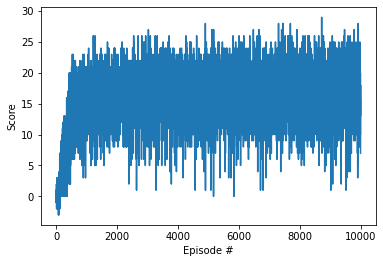

In [10]:
#DQN BananaCollector Training
import time
def dqn(n_episodes=2000, max_t=100000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    solve_score_list=[10.0, 15.0, 20.0, 25.0, 30.0]
    solve_score_idx=0
    for i_episode in range(1, n_episodes+1):
        
        start = time.time()
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations[0] 
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations[0]
            reward = env_info.rewards[0]
            done = env_info.local_done[0]
            agent.step(state, action, reward, next_state, done)
            score += reward
            state = next_state
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        end = time.time() 
        print('\rEpisode {}\tAverage Score: {:.2f} \t {:.2f} Seconds Elapsed'.format(i_episode, np.mean(scores_window), end-start), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=solve_score_list[solve_score_idx]:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint-'+str(i_episode)+'.pth')
            if solve_score_idx<len(solve_score_list)-1:
                solve_score_idx=+1
            else:
                break
         
            
    return scores


from dqn_agent import Agent

agent = Agent(state_size=state_size, action_size=action_size, seed=0)
scores = dqn(n_episodes=10000)

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

## env.close()